In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import median_absolute_error as mdae
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import keras.backend as K
from keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Bidirectional
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('coin_Bitcoin.csv', index_col='Date', parse_dates=True, usecols=['Date','Close']).dropna()
split_size = int(0.8 * len(df))
test_data = df.iloc[split_size: , : ]
train_data = df.iloc[ :split_size, : ]

In [3]:
df.describe()

,Close
count,1463.000000
mean,473.682409
std,276.185596
min,68.431000
25%,246.593506
50%,424.029999
75%,628.152496
max,1347.890015


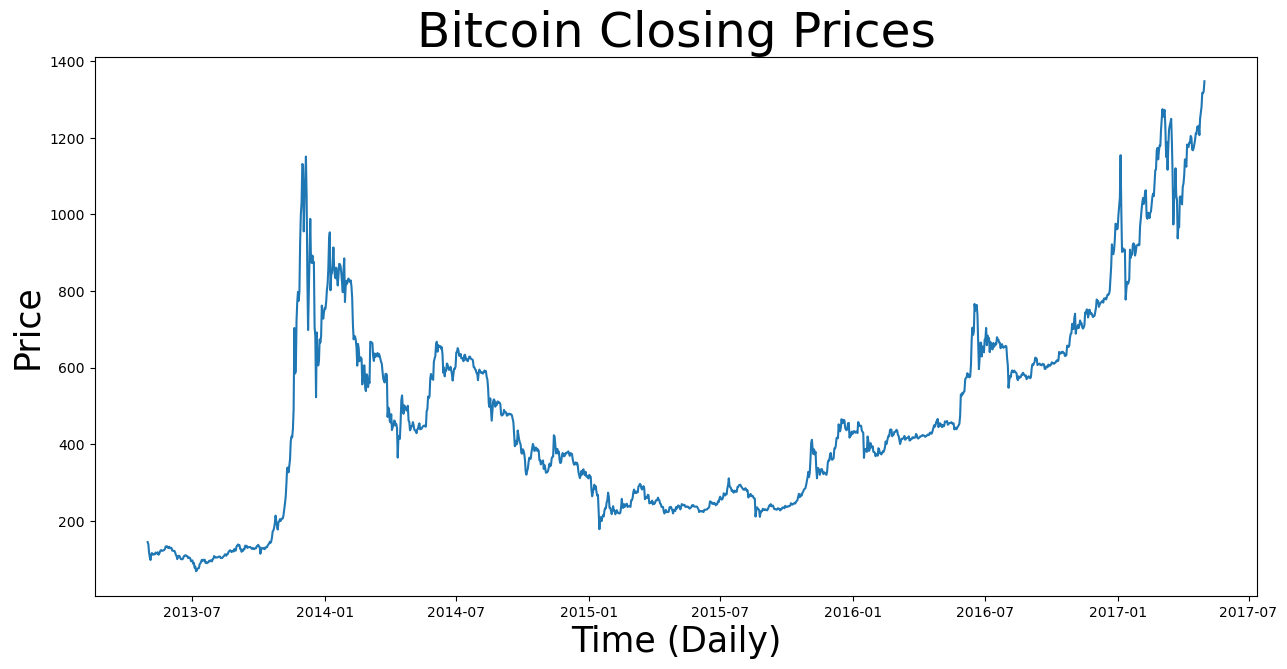

In [4]:
plt.figure(figsize=(15,7))
plt.plot(df)
plt.xlabel("Time (Daily)",fontsize=25)
plt.ylabel("Price",fontsize=25)
plt.title("Bitcoin Closing Prices",fontsize=35)
plt.savefig(fname="bitcoin.pdf", dpi=300)

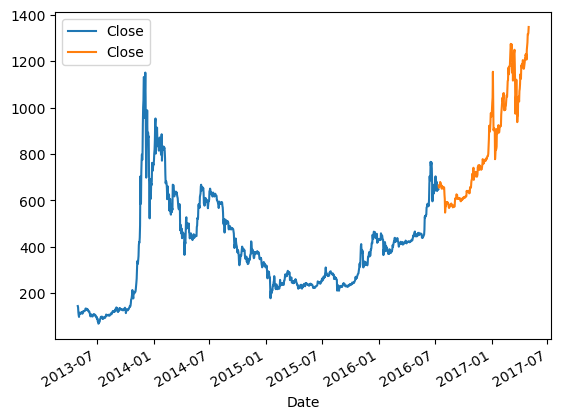

In [5]:
ax=train_data.plot()
test_data.plot(ax=ax)
plt.show()

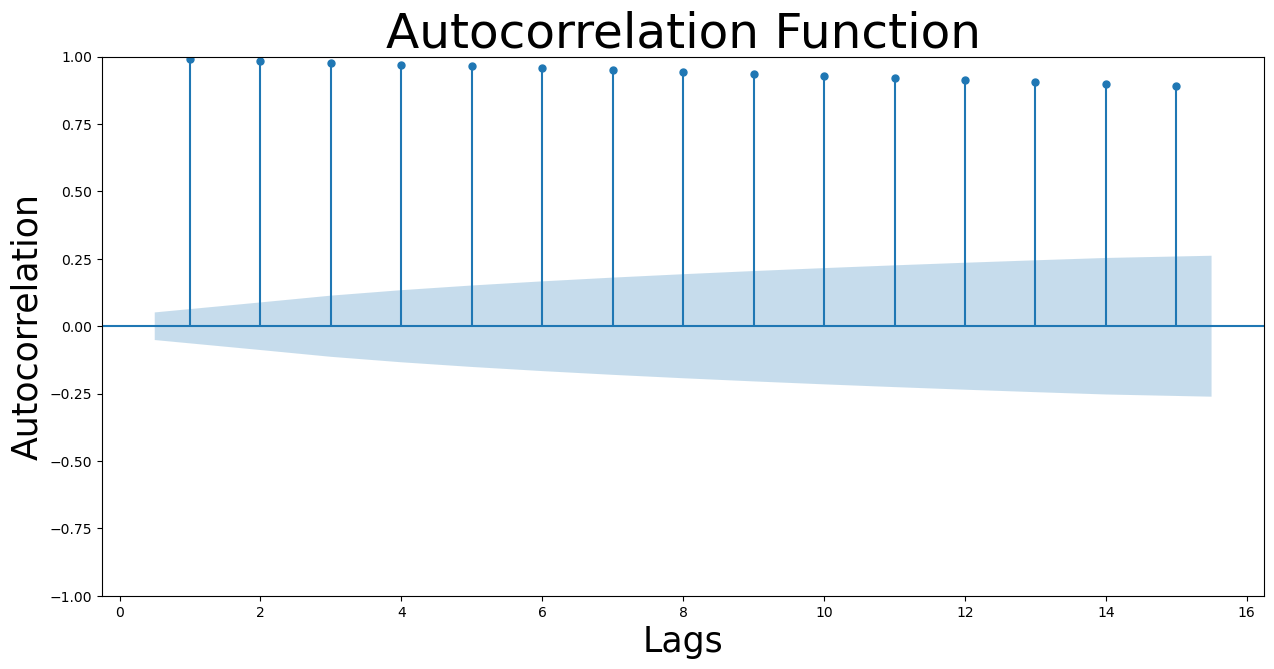

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_acf(df, lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Autocorrelation', fontsize=25)
ax.set_title('Autocorrelation Function', fontsize=35)
plt.savefig(fname="bitcoin_acf.pdf", dpi=300)

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


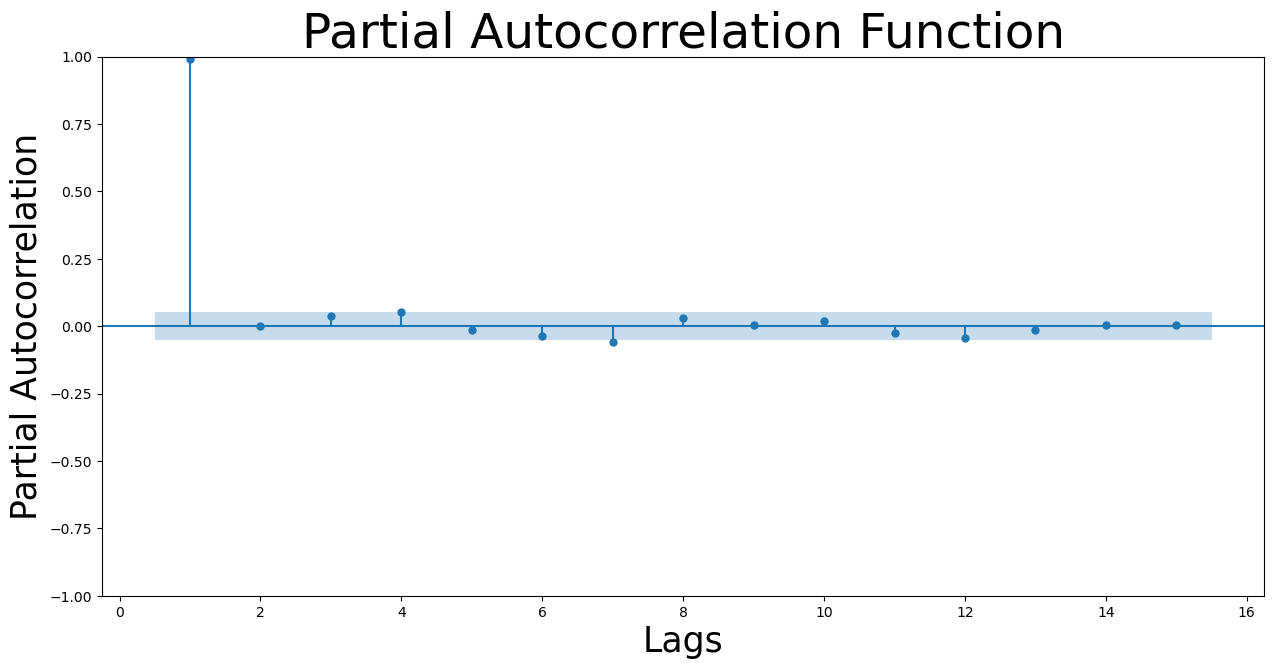

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_pacf(df, lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Partial Autocorrelation', fontsize=25)
ax.set_title('Partial Autocorrelation Function', fontsize=35)
plt.savefig(fname="bitcoin_pacf.pdf", dpi=300)

In [8]:
model_auto = auto_arima(df.Close)
parameter = model_auto.get_params().get('order')
parameter

(2, 1, 3)

In [9]:
adf = adfuller(df)
print(adf[1], kpss(df)[1])

0.943192971702982 0.01


E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [10]:
adf = adfuller(df.diff().dropna())
print(adf[1], kpss(df.diff().dropna())[1])

9.227797221232414e-16 0.1


E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


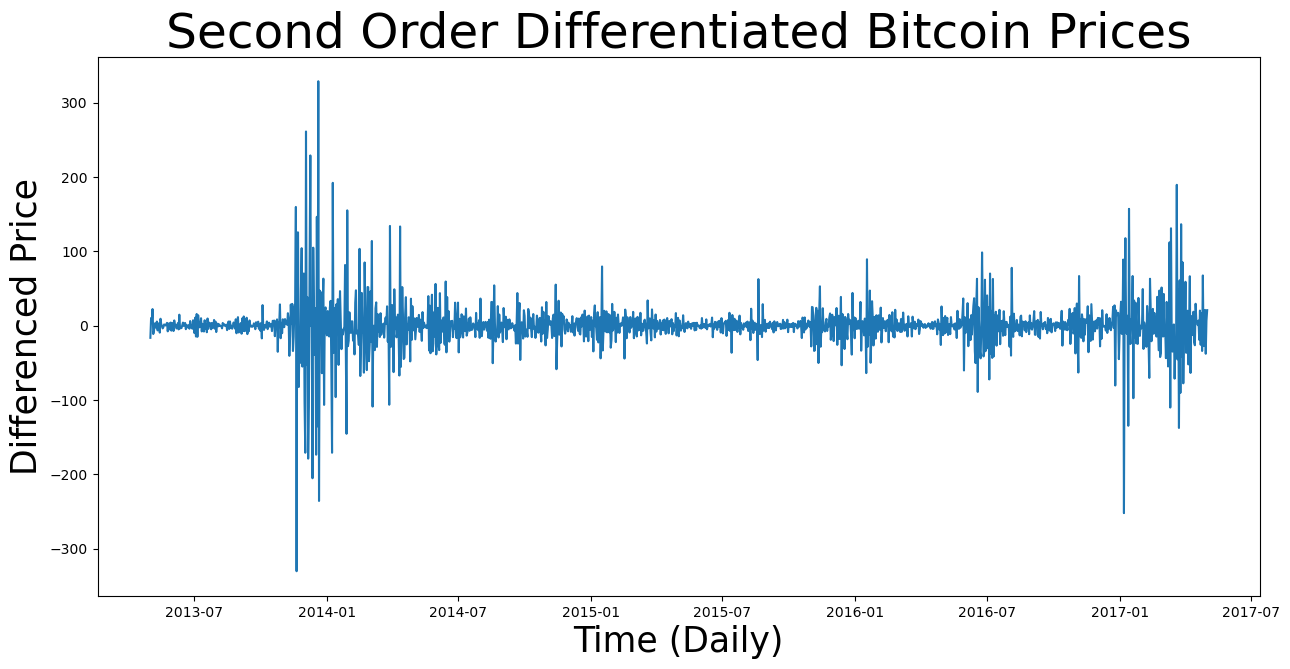

In [11]:
plt.figure(figsize=(15,7))
plt.plot(df.diff().dropna().diff().dropna())
plt.xlabel("Time (Daily)",fontsize=25)
plt.ylabel("Differenced Price",fontsize=25)
plt.title("Second Order Differentiated Bitcoin Prices",fontsize=35)
plt.savefig(fname="bitcoin_diff.pdf", dpi=300)

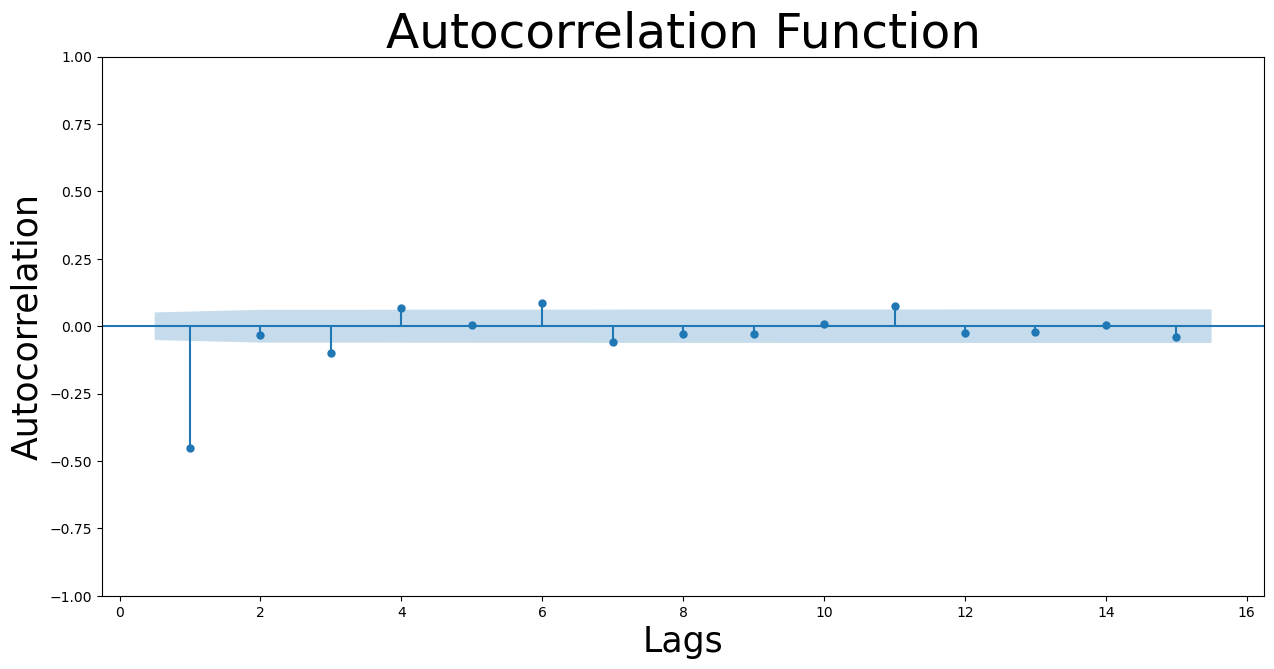

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_acf(df.diff().dropna().diff().dropna(), lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Autocorrelation', fontsize=25)
ax.set_title('Autocorrelation Function', fontsize=35)
plt.savefig(fname="bitcoin_diff_acf.pdf", dpi=300)

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


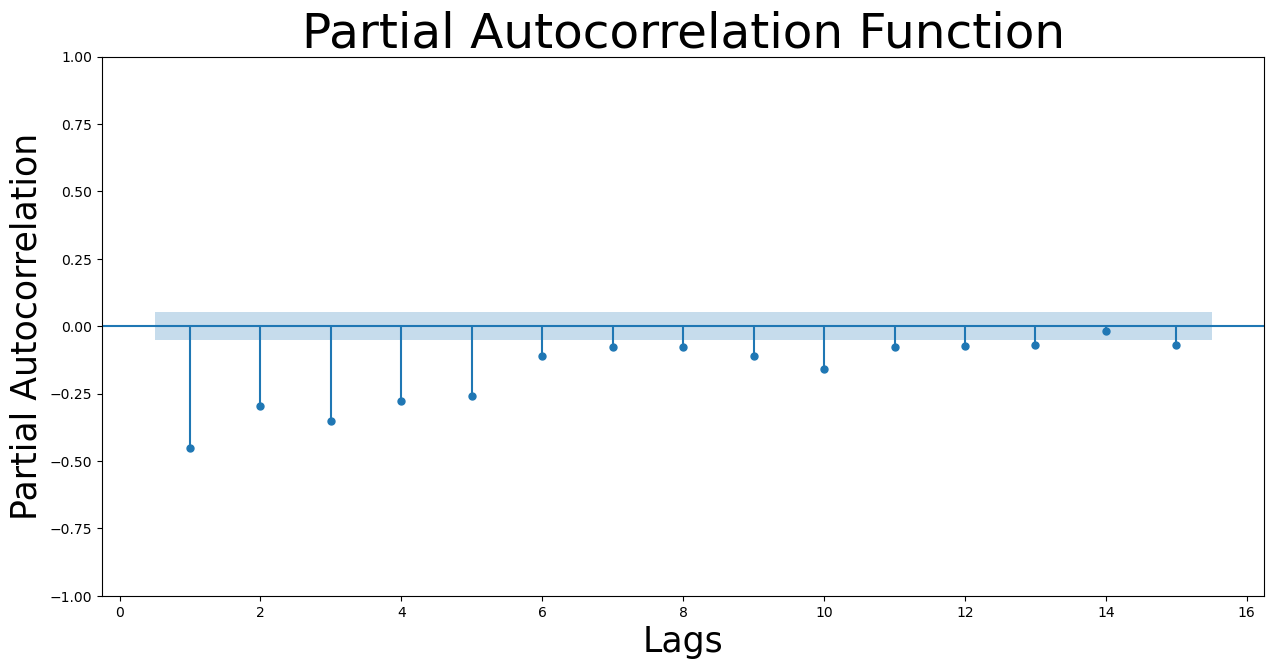

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_pacf(df.diff().dropna().diff().dropna(), lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Partial Autocorrelation', fontsize=25)
ax.set_title('Partial Autocorrelation Function', fontsize=35)
plt.savefig(fname="bitcoin_diff_pacf.pdf", dpi=300)

In [14]:
arima_model = ARIMA(train_data.Close, order = parameter)
results = arima_model.fit()
results.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1170
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5327.995
Date:                Wed, 04 Oct 2023   AIC                          10667.991
Time:                        09:28:58   BIC                          10698.374
Sample:                    04-29-2013   HQIC                         10679.451
                         - 07-11-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7413      0.009     78.462      0.000       0.723       0.760
ar.L2         -0.9635      0.010   -101.094      0.000      -0.982      -0.945
ma.L1         -0.7535      0.014    -55.057      0.000      -0.780      -0.727
ma.L2          0.9222      0.016     59.127      0.000       0.892       0.953
ma.L3         -0.0352      0.012     -3.031      0.002      -0.058      -0.012
sigma2       532.1556      6.884     77.303      0.000     518.663     545.648
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24895.55
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


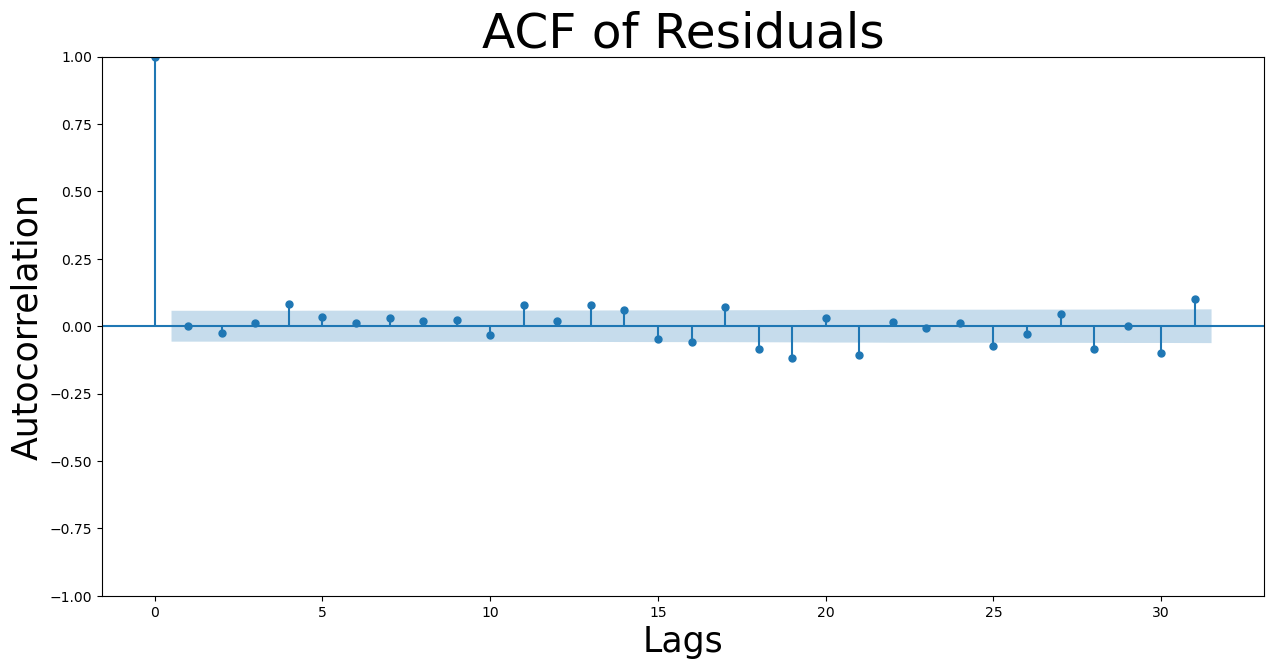

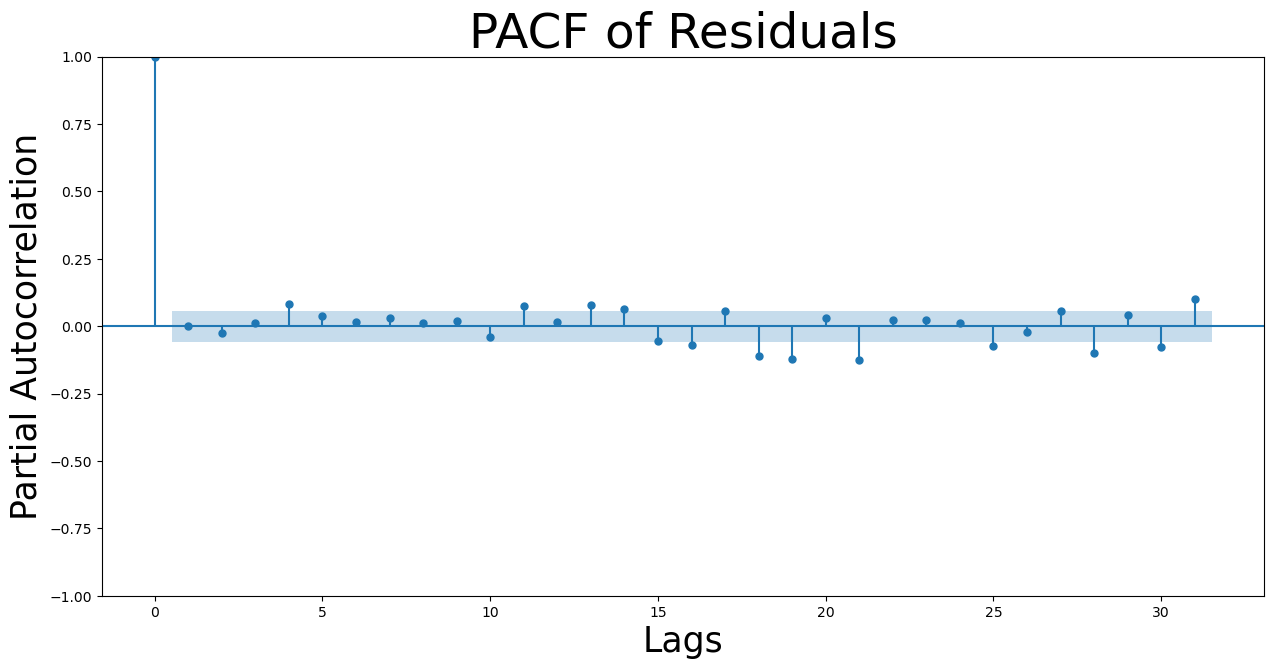

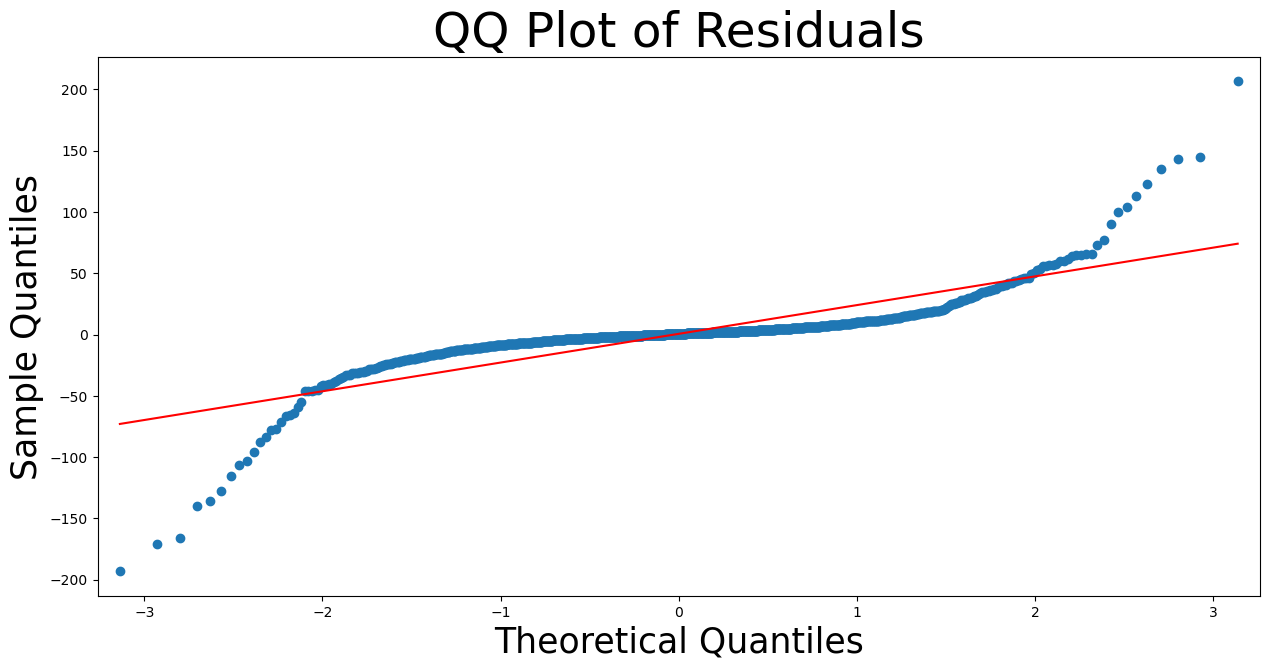

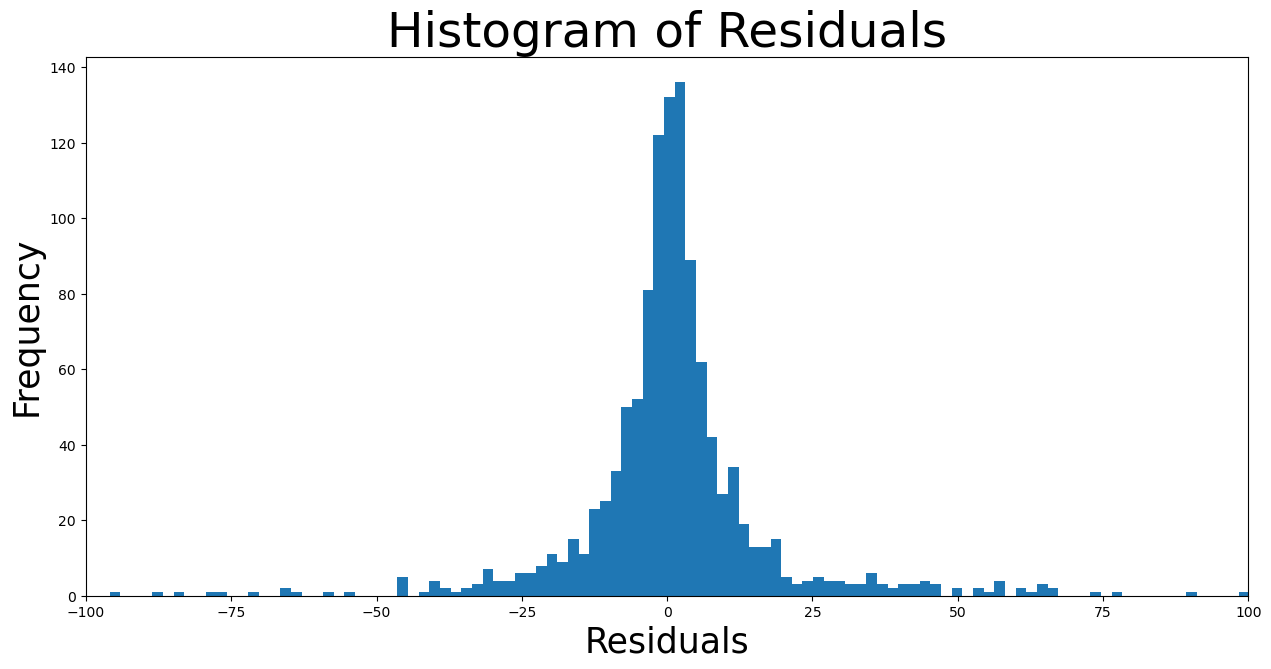

In [15]:
residuals = results.resid

# Plot ACF of the residuals
fig1, ax1 = plt.subplots(figsize=(15, 7))
sm.graphics.tsa.plot_acf(residuals, ax=ax1)
ax1.set_xlabel('Lags', fontsize=25)
ax1.set_ylabel('Autocorrelation', fontsize=25)
ax1.set_title('ACF of Residuals', fontsize=35)
plt.savefig(fname="bitcoin_resid_acf.pdf", dpi=300)

# Plot PACF of the residuals
fig2, ax2 = plt.subplots(figsize=(15, 7))
sm.graphics.tsa.plot_pacf(residuals, ax=ax2)
ax2.set_xlabel('Lags', fontsize=25)
ax2.set_ylabel('Partial Autocorrelation', fontsize=25)
ax2.set_title('PACF of Residuals', fontsize=35)
plt.savefig(fname="bitcoin_resid_pacf.pdf", dpi=300)

# Plot QQ plot of the residuals
fig3, ax3 = plt.subplots(figsize=(15, 7))
qqplot(residuals, line='s', ax=ax3)
ax3.set_xlabel('Theoretical Quantiles', fontsize=25)
ax3.set_ylabel('Sample Quantiles', fontsize=25)
ax3.set_title('QQ Plot of Residuals', fontsize=35)
plt.savefig(fname="bitcoin_resid_qqplot.pdf", dpi=300)

# Plot histogram of the residuals
fig4, ax4 = plt.subplots(figsize=(15, 7))
ax4.hist(residuals, bins='auto')
ax4.set_xlabel('Residuals', fontsize=25)
ax4.set_ylabel('Frequency', fontsize=25)
ax4.set_title('Histogram of Residuals', fontsize=35)
plt.xlim([-100, 100])
plt.savefig(fname="bitcoin_resid_hist.pdf", dpi=300)

In [16]:
arima_preds = []
dummy = list(train_data.Close)
dummy_test = list(test_data.Close)
for i in range(len(test_data)):
    dummy_model = ARIMA(dummy, order = parameter)
    yhat = list(dummy_model.fit().forecast())
    arima_preds.append(yhat)
    dummy.append(dummy_test[i])
    

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

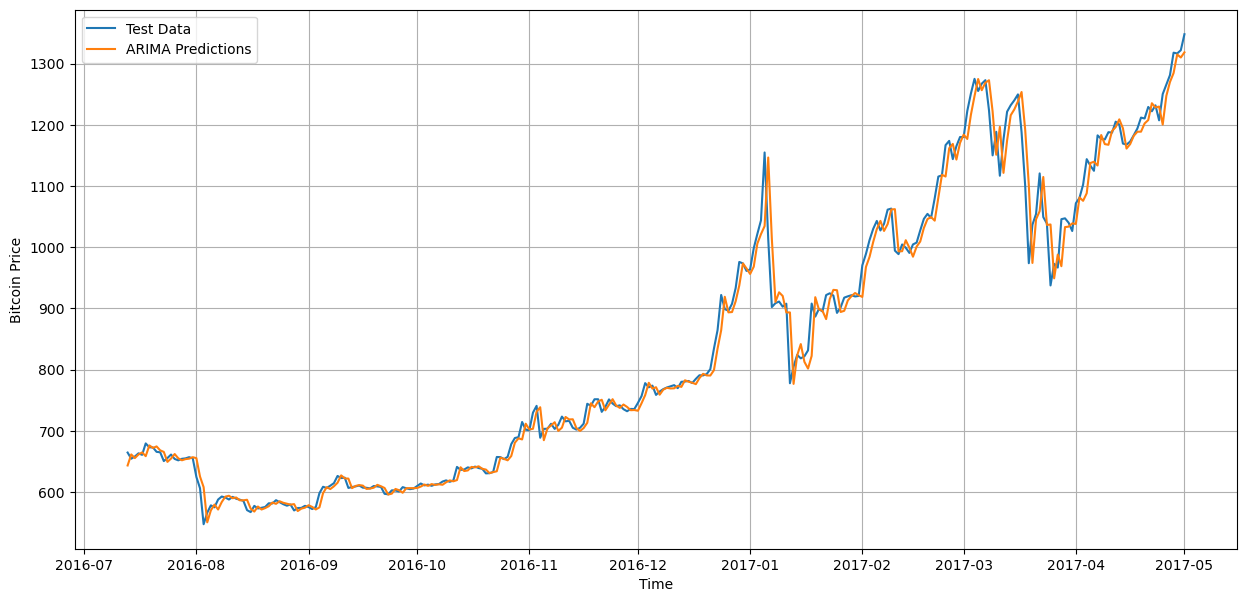

In [17]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test Data')
plt.grid(True)
plt.plot(test_data.index, arima_preds,label='ARIMA Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [18]:
rmse_arima = rmse(test_data, arima_preds)
rmse_arima[0]

27.406807355889693

In [19]:
mape_arima = mape(test_data, arima_preds)
mape_arima*100

1.741036170667315

In [20]:
mdae_arima = mdae(test_data, arima_preds)
print("Median Absolute Error:", mdae_arima)

Median Absolute Error: 7.476802645564931


In [21]:
arima_r2 = r2(test_data, arima_preds)
arima_r2

0.985471870566052

In [22]:
val_size = int(len(train_data) * 0.2)
validation_data = train_data[-val_size:]
train_data = train_data[:-val_size]

In [23]:
arima_val_preds = []
dummy = list(train_data.Close)
dummy_test = list(validation_data.Close)
for i in range(len(validation_data)):
    dummy_model = ARIMA(dummy, order = parameter)
    yhat = list(dummy_model.fit().forecast())
    arima_val_preds.append(yhat)
    dummy.append(dummy_test[i])

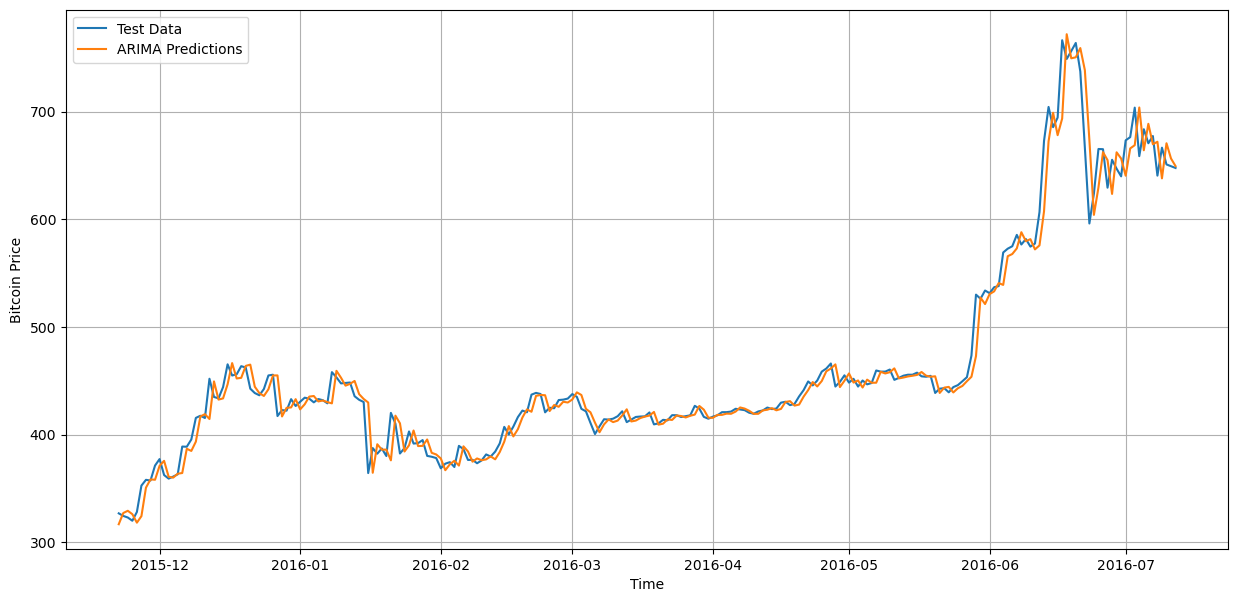

In [24]:
plt.figure(figsize=(15,7))
plt.plot(validation_data,label='Test Data')
plt.grid(True)
plt.plot(validation_data.index, arima_val_preds,label='ARIMA Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [25]:
train_data

,Close
Date,
2013-04-29 23:59:00,144.539993
2013-04-30 23:59:00,139.000000
2013-05-01 23:59:00,116.989998
2013-05-02 23:59:00,105.209999
2013-05-03 23:59:00,97.750000
...,...
2015-11-16 23:59:00,330.751007
2015-11-17 23:59:00,335.093994
2015-11-18 23:59:00,334.589996


In [26]:
validation_data

,Close
Date,
2015-11-21 23:59:00,326.927002
2015-11-22 23:59:00,324.536011
2015-11-23 23:59:00,323.045990
2015-11-24 23:59:00,320.045990
2015-11-25 23:59:00,328.205994
...,...
2016-07-07 23:59:00,640.562012
2016-07-08 23:59:00,666.523010
2016-07-09 23:59:00,650.960022


In [27]:
test_data

,Close
Date,
2016-07-12 23:59:00,664.551025
2016-07-13 23:59:00,654.468018
2016-07-14 23:59:00,658.078003
2016-07-15 23:59:00,663.255005
2016-07-16 23:59:00,660.767029
...,...
2017-04-26 23:59:00,1281.079956
2017-04-27 23:59:00,1317.729980
2017-04-28 23:59:00,1316.479980


In [28]:
WINDOW_SIZE = 7

In [29]:
ext_test_data = test_data
ext_test_data = pd.concat([validation_data[-WINDOW_SIZE:], test_data])
ext_val_data = validation_data
ext_val_data = pd.concat([train_data[-WINDOW_SIZE:], validation_data])

In [30]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_validation_data = scaler.transform(ext_val_data)
scaled_test_data = scaler.transform(ext_test_data)

In [31]:
norm_arima_preds = scaler.transform(arima_preds)
norm_arima_preds

E:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.53106487],
       [0.54770586],
       [0.5422026 ],
       [0.54760275],
       [0.55079491],
       [0.54510923],
       [0.56136181],
       [0.55749879],
       [0.55981915],
       [0.55388908],
       [0.55152199],
       [0.53648029],
       [0.54148016],
       [0.54833277],
       [0.54187119],
       [0.53887153],
       [0.54066347],
       [0.54132765],
       [0.54356028],
       [0.54209161],
       [0.51435201],
       [0.49834344],
       [0.44524686],
       [0.46335039],
       [0.47204482],
       [0.4645969 ],
       [0.47583629],
       [0.48401719],
       [0.48536602],
       [0.48165037],
       [0.48277429],
       [0.47849995],
       [0.47852236],
       [0.47930066],
       [0.46598196],
       [0.46149037],
       [0.46916068],
       [0.46462597],
       [0.46674678],
       [0.46960133],
       [0.4751549 ],
       [0.47317109],
       [0.47709588],
       [0.4747843 ],
       [0.47345737],
       [0.4719968 ],
       [0.47273916],
       [0.462

In [32]:
norm_arima_rmse = rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(norm_arima_preds).squeeze())
norm_arima_mape = mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(norm_arima_preds).squeeze())
norm_arima_mdae = mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(norm_arima_preds).squeeze())
print(norm_arima_rmse, norm_arima_mape, norm_arima_mdae)

0.025312477186160018 0.01893067131851223 0.006905452135803625


In [33]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return sequences

In [34]:
train_sequences = create_sequences(scaled_train_data, WINDOW_SIZE+1)
train_sequences = np.array(train_sequences)
X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1]
print(X_train.shape, y_train.shape)

(929, 7, 1) (929, 1)


In [35]:
test_sequences = create_sequences(scaled_test_data, WINDOW_SIZE+1)
test_sequences = np.array(test_sequences)
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1]
print(X_test.shape, y_test.shape)

(293, 7, 1) (293, 1)


In [36]:
val_sequences = create_sequences(scaled_validation_data, WINDOW_SIZE+1)
val_sequences = np.array(val_sequences)
X_val = val_sequences[:, :-1]
y_val = val_sequences[:, -1]
print(X_val.shape, y_val.shape)

(234, 7, 1) (234, 1)


In [37]:
optimizer = 'adam'
batch_size = 32

In [38]:
def lstm_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1)))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True))
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [39]:
lstm_tuner= kt.RandomSearch(
    lstm_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='mydir',
    project_name='Bitcoin',
)

INFO:tensorflow:Reloading Tuner from mydir\Bitcoin\tuner0.json


In [40]:
lstm_tuner.search(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val,y_val),
)

INFO:tensorflow:Oracle triggered exit


In [41]:
best_lstm_model = lstm_tuner.get_best_models(num_models=1)[0]
best_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 192)            148992    
                                                                 
 lstm_1 (LSTM)               (None, 7, 48)             46272     
                                                                 
 lstm_2 (LSTM)               (None, 192)               185088    
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 192)               37056     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [42]:
lstm_model = Sequential()
lstm_model.add(LSTM(192,return_sequences=True, input_shape=(7,1)))
lstm_model.add(LSTM(48,return_sequences=True))
lstm_model.add(LSTM(192))
lstm_model.add(Dropout(0))
lstm_model.add(Dense(192))
lstm_model.add(Dropout(0))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [43]:
history_lstm = lstm_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
30/30 [==============================] - 16s 92ms/step - loss: 0.0190 - val_loss: 0.0014
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 8.1576e-04
Epoch 3/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 8.6436e-04
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 8.9789e-04
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 7/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0027 - val_loss: 8.7698e-04
Epoch 8/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 9/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 7.2842e-04
Epoch 10/100
30/30 [==============================] - 0s 15ms/step - loss: 0.00

Epoch 78/100
30/30 [==============================] - 0s 12ms/step - loss: 6.0561e-04 - val_loss: 2.2832e-04
Epoch 79/100
30/30 [==============================] - 0s 11ms/step - loss: 6.3301e-04 - val_loss: 2.1803e-04
Epoch 80/100
30/30 [==============================] - 0s 11ms/step - loss: 5.7978e-04 - val_loss: 4.3538e-04
Epoch 81/100
30/30 [==============================] - 0s 10ms/step - loss: 6.9854e-04 - val_loss: 2.5997e-04
Epoch 82/100
30/30 [==============================] - 0s 10ms/step - loss: 6.7341e-04 - val_loss: 3.5381e-04
Epoch 83/100
30/30 [==============================] - 0s 10ms/step - loss: 8.5942e-04 - val_loss: 0.0030
Epoch 84/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 2.7520e-04
Epoch 85/100
30/30 [==============================] - 0s 14ms/step - loss: 7.2912e-04 - val_loss: 8.8268e-04
Epoch 86/100
30/30 [==============================] - 0s 12ms/step - loss: 9.7458e-04 - val_loss: 5.1336e-04
Epoch 87/100
30/30 [=======

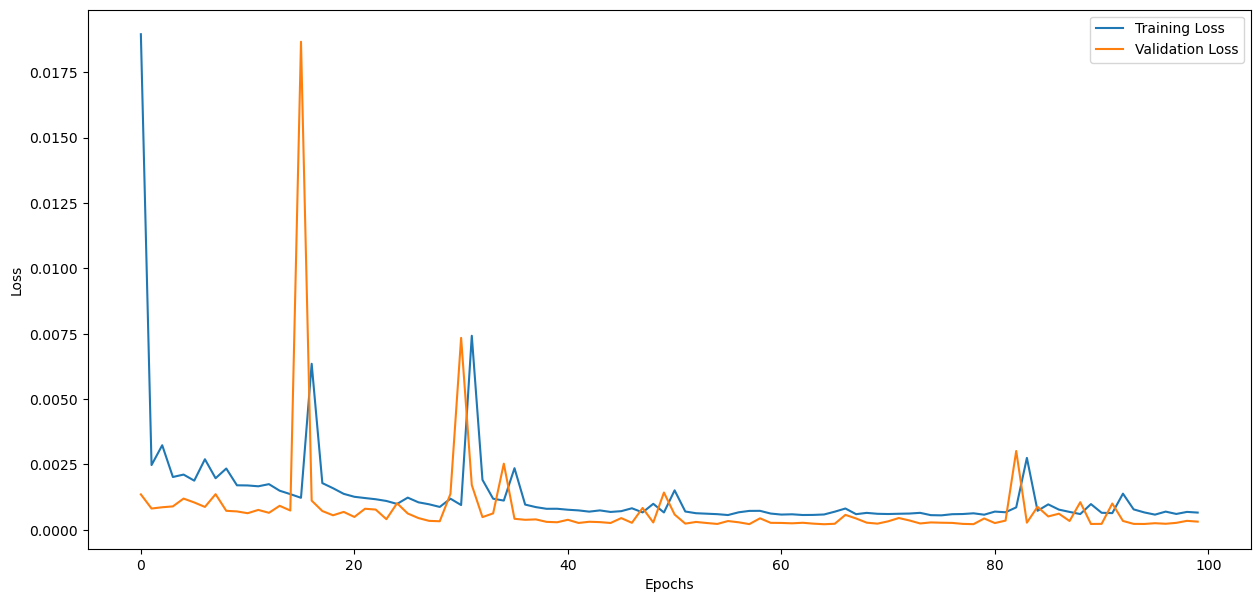

In [44]:
history_df = pd.DataFrame(history_lstm.history)

# Plot the data with labels and increased figsize
plt.figure(figsize=(15, 7))  # Set the figsize
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.savefig(fname="Bitcoin_lstm_lve.pdf", dpi=300)

In [184]:
lstm_norm_val_preds = lstm_model.predict(X_val)
lstm_val_preds = scaler.inverse_transform(lstm_norm_val_preds)

8/8 [==============================] - 1s 3ms/step


In [185]:
from sklearn.linear_model import LinearRegression
regX = np.concatenate((np.array(arima_val_preds),lstm_val_preds),axis=1)
regY = validation_data.Close.values.reshape(-1,1)
reg = LinearRegression().fit(regX, regY)
print(reg.coef_, reg.intercept_, reg.score(regX, regY))

[[-0.55054114  1.60609238]] [-15.1609782] 0.9726197919738611


In [186]:
lstm_norm_preds = lstm_model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_norm_preds)

10/10 [==============================] - 0s 4ms/step


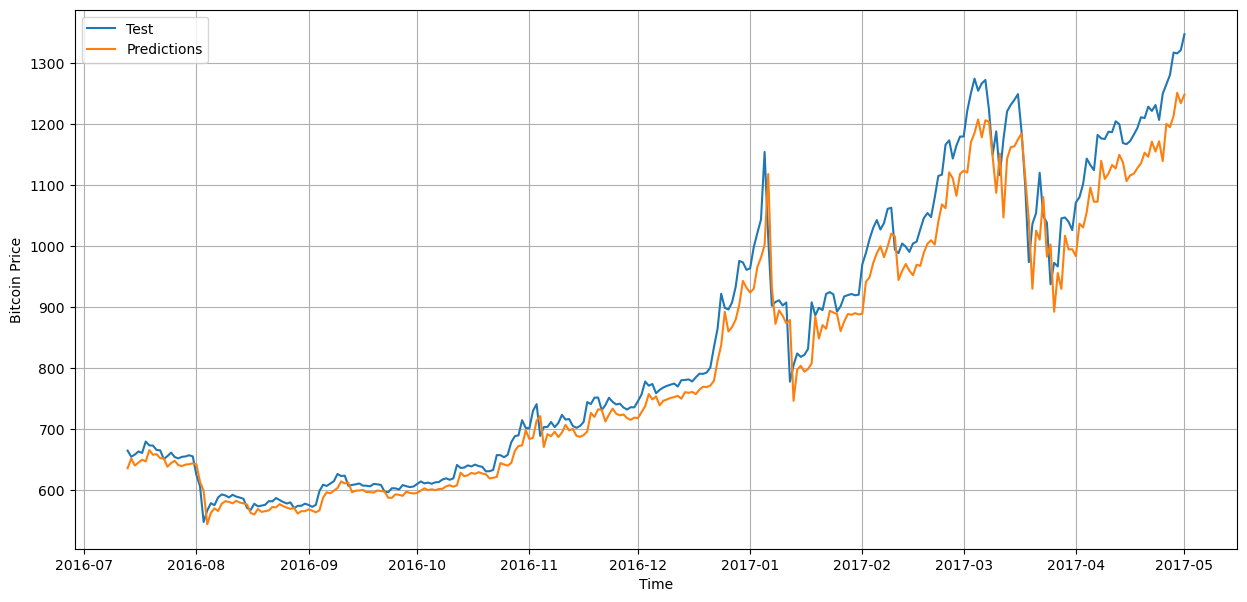

In [187]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, lstm_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [188]:
norm_reg_test = np.concatenate((np.array(norm_arima_preds),lstm_norm_preds),axis=1)
arima_lstm_norm_preds = reg.predict(norm_reg_test)

In [189]:
reg_test = np.concatenate((np.array(arima_preds),lstm_preds),axis=1)
arima_lstm_preds = reg.predict(reg_test)

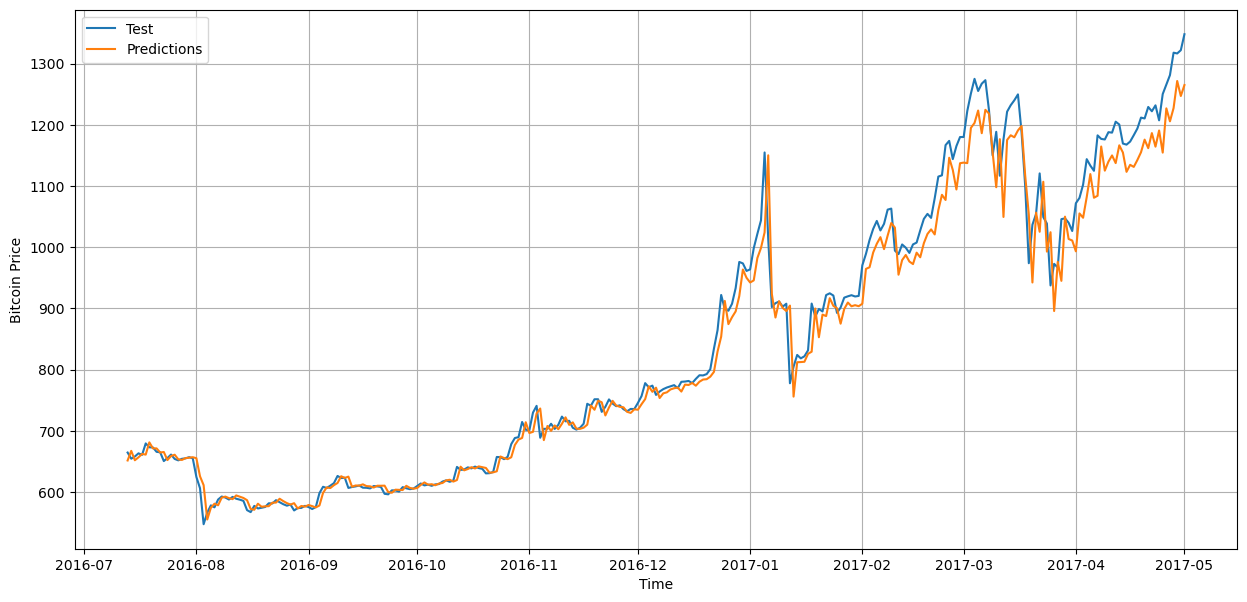

In [190]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, arima_lstm_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [191]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_lstm_rmse_scores = []
norm_lstm_mdae_scores = []
norm_lstm_mape_scores = []

lstm_rmse_scores = []
lstm_mdae_scores = []
lstm_mape_scores = []
lstm_r2_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
lstm_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = lstm_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = lstm_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_lstm_preds = lstm_model.predict(k_X_test)
    
    norm_lstm_rmse_scores.append(rmse(k_norm_lstm_preds, k_y_test)[0])
    norm_lstm_mdae_scores.append(mdae(k_norm_lstm_preds, k_y_test))
    norm_lstm_mape_scores.append(mape(k_norm_lstm_preds, k_y_test))
    
    k_lstm_preds = lstm_scaler.inverse_transform(k_norm_lstm_preds)
    
    lstm_rmse_scores.append(rmse(k_lstm_preds, k_y_test)[0])
    lstm_mdae_scores.append(mdae(k_lstm_preds, k_y_test))
    lstm_mape_scores.append(mape(k_lstm_preds, k_y_test))
    lstm_r2_scores.append(r2(k_lstm_preds, k_y_test))


5/5 [==============================] - 0s 5ms/step


In [192]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_lstm_rmse = np.mean(norm_lstm_rmse_scores)
norm_std_lstm_rmse = np.std(norm_lstm_rmse_scores)
norm_avg_lstm_mdae = np.mean(norm_lstm_mdae_scores)
norm_std_lstm_mdae = np.std(norm_lstm_mdae_scores)
norm_avg_lstm_mape = np.mean(norm_lstm_mape_scores)
norm_std_lstm_mape = np.std(norm_lstm_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_lstm_rmse:.4f} +/- {norm_std_lstm_rmse:.4f}")
print(f"Average MDAE: {norm_avg_lstm_mdae:.4f} +/- {norm_std_lstm_mdae:.4f}")
print(f"Average MAPE: {norm_avg_lstm_mape:.4f} +/- {norm_std_lstm_mape:.4f}")

Average RMSE: 0.0203 +/- 0.0170
Average MDAE: 0.0113 +/- 0.0138
Average MAPE: 0.0375 +/- 0.0181


In [193]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
avg_lstm_rmse = np.mean(lstm_rmse_scores)
std_lstm_rmse = np.std(lstm_rmse_scores)
avg_lstm_mdae = np.mean(lstm_mdae_scores)
std_lstm_mdae = np.std(lstm_mdae_scores)
avg_lstm_mape = np.mean(lstm_mape_scores)
std_lstm_mape = np.std(lstm_mape_scores)
avg_lstm_r2 = np.mean(lstm_r2_scores)
std_lstm_r2 = np.std(lstm_r2_scores)

# Print the overall evaluation results
print(f"Average RMSE: {avg_lstm_rmse:.4f} +/- {std_lstm_rmse:.4f}")
print(f"Average MDAE: {avg_lstm_mdae:.4f} +/- {std_lstm_mdae:.4f}")
print(f"Average MAPE: {avg_lstm_mape:.4f} +/- {std_lstm_mape:.4f}")
print(f"Average R2: {avg_lstm_r2:.4f} +/- {std_lstm_r2:.4f}")

Average RMSE: 519.2930 +/- 221.3879
Average MDAE: 508.0525 +/- 226.3606
Average MAPE: 0.9993 +/- 0.0001
Average R2: -55.4235 +/- 41.7748


In [169]:
def bi_lstm_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1))))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Bidirectional(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True)))
    model.add(Bidirectional(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16))))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [170]:
bi_lstm_tuner= kt.RandomSearch(
    bi_lstm_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='mydir',
    project_name='bitcoin_bi_lstm',
)

In [171]:
bi_lstm_tuner.search(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val,y_val),
)

Trial 5 Complete [00h 00m 59s]
val_loss: 0.000477171231371661

Best val_loss So Far: 0.000477171231371661
Total elapsed time: 00h 07m 04s
INFO:tensorflow:Oracle triggered exit


In [172]:
best_bi_lstm_model = bi_lstm_tuner.get_best_models(num_models=1)[0]
best_bi_lstm_model.build(input_shape=(None,WINDOW_SIZE,1))
best_bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 7, 256)           133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 64)            73984     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 7, 224)           158592    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 7, 96)            104832    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              2

In [194]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(256,return_sequences=True, input_shape=(7,1))))
bi_lstm_model.add(Bidirectional(LSTM(64,return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(224,return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(96,return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(256)))
bi_lstm_model.add(Dropout(0))
bi_lstm_model.add(Dense(128))
bi_lstm_model.add(Dropout(0))
bi_lstm_model.add(Dense(1))
bi_lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [195]:
history_bi_lstm = bi_lstm_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
30/30 [==============================] - 16s 148ms/step - loss: 0.0213 - val_loss: 0.0030
Epoch 2/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0043 - val_loss: 0.0018
Epoch 3/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 4/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 5/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 5.0289e-04
Epoch 6/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0016 - val_loss: 4.6963e-04
Epoch 7/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0014 - val_loss: 9.6979e-04
Epoch 8/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0012 - val_loss: 4.9937e-04
Epoch 9/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0011 - val_loss: 3.9788e-04
Epoch 10/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0

Epoch 79/100
30/30 [==============================] - 1s 25ms/step - loss: 8.6367e-04 - val_loss: 7.7880e-04
Epoch 80/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 2.6509e-04
Epoch 81/100
30/30 [==============================] - 1s 24ms/step - loss: 8.3957e-04 - val_loss: 2.6987e-04
Epoch 82/100
30/30 [==============================] - 1s 23ms/step - loss: 7.7420e-04 - val_loss: 3.0273e-04
Epoch 83/100
30/30 [==============================] - 1s 24ms/step - loss: 7.5380e-04 - val_loss: 4.4174e-04
Epoch 84/100
30/30 [==============================] - 1s 25ms/step - loss: 8.5033e-04 - val_loss: 4.0938e-04
Epoch 85/100
30/30 [==============================] - 1s 23ms/step - loss: 9.1688e-04 - val_loss: 5.8792e-04
Epoch 86/100
30/30 [==============================] - 1s 23ms/step - loss: 6.9672e-04 - val_loss: 2.2799e-04
Epoch 87/100
30/30 [==============================] - 1s 26ms/step - loss: 9.5542e-04 - val_loss: 0.0010
Epoch 88/100
30/30 [=======

<Axes: >

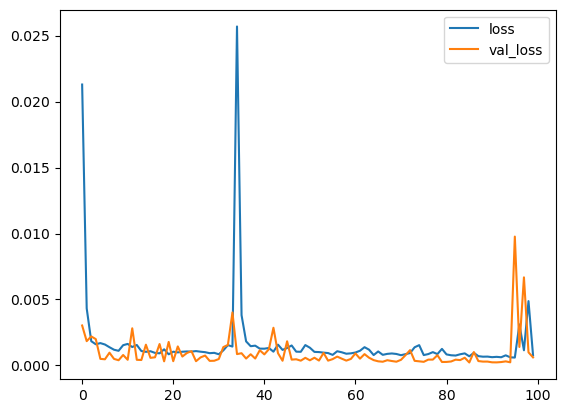

In [196]:
pd.DataFrame(history_bi_lstm.history).plot()

In [197]:
bi_lstm_norm_preds = bi_lstm_model.predict(X_test)
bi_lstm_preds = scaler.inverse_transform(bi_lstm_norm_preds)

10/10 [==============================] - 3s 16ms/step


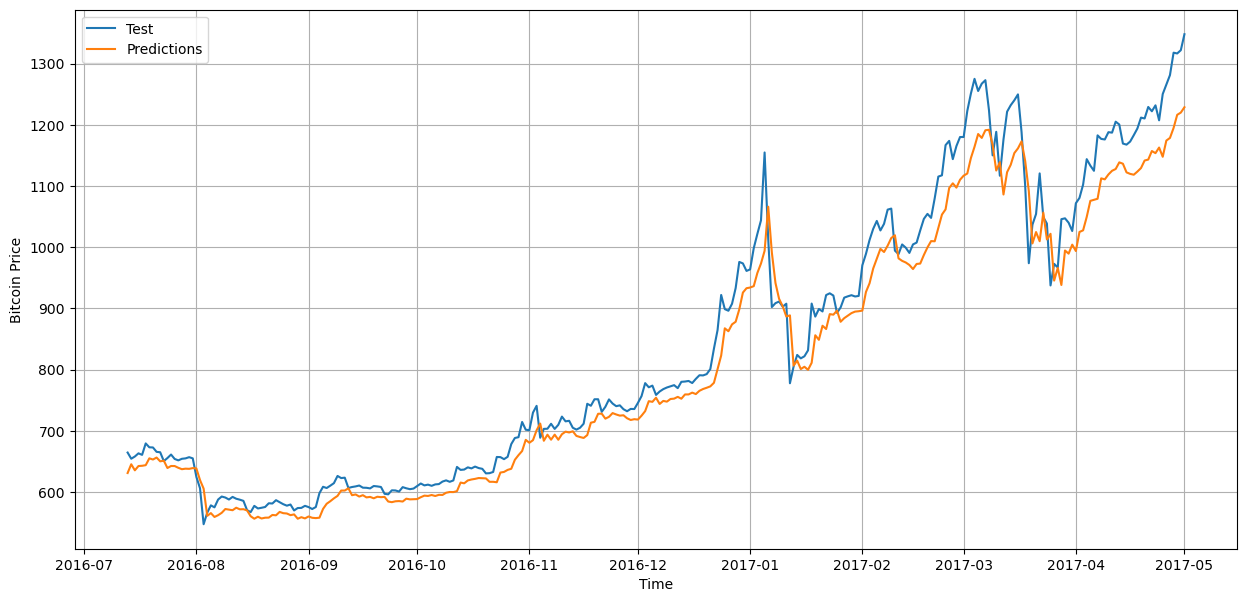

In [198]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, bi_lstm_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [199]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_bi_lstm_rmse_scores = []
norm_bi_lstm_mdae_scores = []
norm_bi_lstm_mape_scores = []

bi_lstm_rmse_scores = []
bi_lstm_mdae_scores = []
bi_lstm_mape_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
bi_lstm_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = bi_lstm_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = bi_lstm_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_bi_lstm_preds = bi_lstm_model.predict(k_X_test)
    
    norm_bi_lstm_rmse_scores.append(rmse(k_norm_bi_lstm_preds, k_y_test)[0])
    norm_bi_lstm_mdae_scores.append(mdae(k_norm_bi_lstm_preds, k_y_test))
    norm_bi_lstm_mape_scores.append(mape(k_norm_bi_lstm_preds, k_y_test))
    
    k_bi_lstm_preds = bi_lstm_scaler.inverse_transform(k_norm_bi_lstm_preds)
    
    bi_lstm_rmse_scores.append(rmse(k_bi_lstm_preds, k_y_test)[0])
    bi_lstm_mdae_scores.append(mdae(k_bi_lstm_preds, k_y_test))
    bi_lstm_mape_scores.append(mape(k_bi_lstm_preds, k_y_test))


5/5 [==============================] - 0s 11ms/step


In [200]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_bi_lstm_rmse = np.mean(norm_bi_lstm_rmse_scores)
norm_std_bi_lstm_rmse = np.std(norm_bi_lstm_rmse_scores)
norm_avg_bi_lstm_mdae = np.mean(norm_bi_lstm_mdae_scores)
norm_std_bi_lstm_mdae = np.std(norm_bi_lstm_mdae_scores)
norm_avg_bi_lstm_mape = np.mean(norm_bi_lstm_mape_scores)
norm_std_bi_lstm_mape = np.std(norm_bi_lstm_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_bi_lstm_rmse:.4f} +/- {norm_std_bi_lstm_rmse:.4f}")
print(f"Average MDAE: {norm_avg_bi_lstm_mdae:.4f} +/- {norm_std_bi_lstm_mdae:.4f}")
print(f"Average MAPE: {norm_avg_bi_lstm_mape:.4f} +/- {norm_std_bi_lstm_mape:.4f}")

Average RMSE: 0.0284 +/- 0.0152
Average MDAE: 0.0213 +/- 0.0108
Average MAPE: 0.0926 +/- 0.0451


In [173]:
def gru_model(hp):
    model = Sequential()
    model.add(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1)))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(GRU(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True))
    model.add(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [174]:
gru_tuner= kt.RandomSearch(
    gru_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='mydir',
    project_name='bitcoin_gru',
)

In [175]:
gru_tuner.search(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val,y_val),
)

Trial 5 Complete [00h 00m 30s]
val_loss: 0.0006879396387375891

Best val_loss So Far: 0.0006879396387375891
Total elapsed time: 00h 03m 03s
INFO:tensorflow:Oracle triggered exit


In [176]:
best_gru_model = gru_tuner.get_best_models(num_models=1)[0]
best_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 112)            38640     
                                                                 
 gru_1 (GRU)                 (None, 7, 128)            92928     
                                                                 
 gru_2 (GRU)                 (None, 7, 32)             15552     
                                                                 
 gru_3 (GRU)                 (None, 7, 112)            49056     
                                                                 
 gru_4 (GRU)                 (None, 112)               75936     
                                                                 
 dropout (Dropout)           (None, 112)               0         
                                                                 
 dense (Dense)               (None, 112)               1

In [201]:
gru_model = Sequential()
gru_model.add(GRU(112,return_sequences=True, input_shape=(7,1)))
gru_model.add(GRU(128,return_sequences=True))
gru_model.add(GRU(32,return_sequences=True))
gru_model.add(GRU(112,return_sequences=True))
gru_model.add(GRU(112))
gru_model.add(Dropout(0))
gru_model.add(Dense(112))
gru_model.add(Dropout(0))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [202]:
history_gru = gru_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
30/30 [==============================] - 7s 53ms/step - loss: 0.0178 - val_loss: 0.0021
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 8.4232e-04
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0.0095
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0062 - val_loss: 0.0028
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 7.1318e-04
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 6.8249e-04
Epoch 8/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 8.6070e-04
Epoch 9/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 6.3335e-04
Epoch 10/100
30/30 [==============================] - 0s 11ms/step - loss: 0.001

<Axes: >

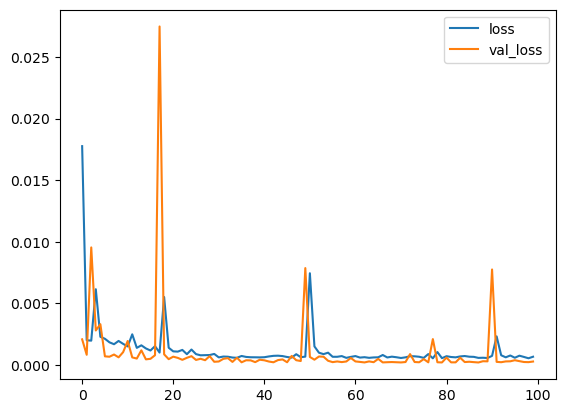

In [203]:
pd.DataFrame(history_gru.history).plot()

In [204]:
gru_norm_preds = gru_model.predict(X_test)
gru_preds = scaler.inverse_transform(gru_norm_preds)

10/10 [==============================] - 1s 6ms/step


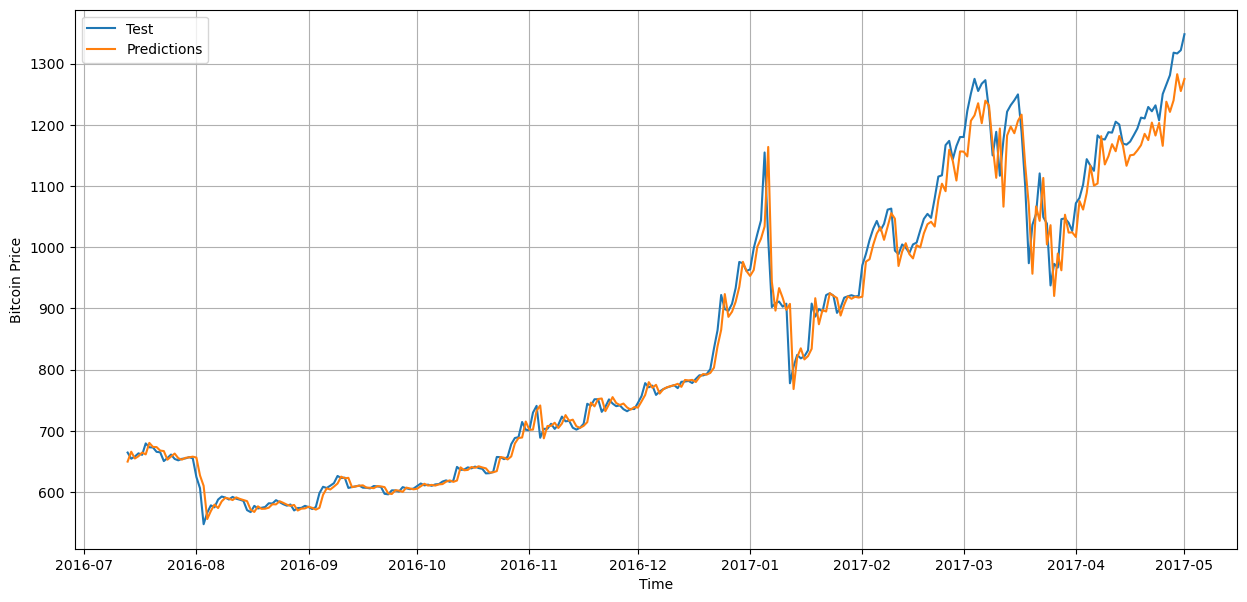

In [205]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, gru_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [206]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_gru_rmse_scores = []
norm_gru_mdae_scores = []
norm_gru_mape_scores = []

gru_rmse_scores = []
gru_mdae_scores = []
gru_mape_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
gru_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = gru_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = gru_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_gru_preds = gru_model.predict(k_X_test)
    
    norm_gru_rmse_scores.append(rmse(k_norm_gru_preds, k_y_test)[0])
    norm_gru_mdae_scores.append(mdae(k_norm_gru_preds, k_y_test))
    norm_gru_mape_scores.append(mape(k_norm_gru_preds, k_y_test))
    
    k_gru_preds = gru_scaler.inverse_transform(k_norm_gru_preds)
    
    gru_rmse_scores.append(rmse(k_gru_preds, k_y_test)[0])
    gru_mdae_scores.append(mdae(k_gru_preds, k_y_test))
    gru_mape_scores.append(mape(k_gru_preds, k_y_test))


5/5 [==============================] - 0s 6ms/step


In [207]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_gru_rmse = np.mean(norm_gru_rmse_scores)
norm_std_gru_rmse = np.std(norm_gru_rmse_scores)
norm_avg_gru_mdae = np.mean(norm_gru_mdae_scores)
norm_std_gru_mdae = np.std(norm_gru_mdae_scores)
norm_avg_gru_mape = np.mean(norm_gru_mape_scores)
norm_std_gru_mape = np.std(norm_gru_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_gru_rmse:.4f} +/- {norm_std_gru_rmse:.4f}")
print(f"Average MDAE: {norm_avg_gru_mdae:.4f} +/- {norm_std_gru_mdae:.4f}")
print(f"Average MAPE: {norm_avg_gru_mape:.4f} +/- {norm_std_gru_mape:.4f}")

Average RMSE: 0.0221 +/- 0.0118
Average MDAE: 0.0141 +/- 0.0061
Average MAPE: 0.0798 +/- 0.0599


In [177]:
def bi_gru_model(hp):
    model = Sequential()
    model.add(Bidirectional(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1))))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Bidirectional(GRU(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True)))
    model.add(Bidirectional(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16))))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [178]:
bi_gru_tuner= kt.RandomSearch(
    bi_gru_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='mydir',
    project_name='bitcoin_bi_gru',
)

In [179]:
bi_gru_tuner.search(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val,y_val),
)

Trial 5 Complete [00h 01m 55s]
val_loss: 0.00047786418387355906

Best val_loss So Far: 0.0004111926828045398
Total elapsed time: 00h 06m 44s
INFO:tensorflow:Oracle triggered exit


In [180]:
best_bi_gru_model = bi_gru_tuner.get_best_models(num_models=1)[0]
best_bi_gru_model.build(input_shape=(None,WINDOW_SIZE,1))
best_bi_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 7, 416)           263328    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 128)           185088    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 416)              421824    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 416)               0         
                                                                 
 dense (Dense)               (None, 208)               86736     
                                                        

In [208]:
bi_gru_model = Sequential()
bi_gru_model.add(Bidirectional(GRU(416,return_sequences=True, input_shape=(7,1))))
bi_gru_model.add(Bidirectional(GRU(128,return_sequences=True)))
bi_gru_model.add(Bidirectional(GRU(416)))
bi_gru_model.add(Dropout(0))
bi_gru_model.add(Dense(208))
bi_gru_model.add(Dropout(0))
bi_gru_model.add(Dense(1))
bi_gru_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [209]:
history_bi_gru = bi_gru_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
30/30 [==============================] - 11s 77ms/step - loss: 0.0120 - val_loss: 6.4155e-04
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 4.6564e-04
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 4.3019e-04
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 4.7385e-04
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 6/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 3.4737e-04
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 6.4360e-04
Epoch 8/100
30/30 [==============================] - 0s 14ms/step - loss: 8.2913e-04 - val_loss: 0.0011
Epoch 9/100
30/30 [==============================] - 0s 13ms/step - loss: 8.7850e-04 - val_loss: 2.9807e-04
Epoch 10/100
30/30 [==============================] - 0s 13ms/s

30/30 [==============================] - 0s 16ms/step - loss: 5.8828e-04 - val_loss: 3.0429e-04
Epoch 78/100
30/30 [==============================] - 0s 13ms/step - loss: 6.5476e-04 - val_loss: 3.3671e-04
Epoch 79/100
30/30 [==============================] - 0s 13ms/step - loss: 6.5876e-04 - val_loss: 2.5932e-04
Epoch 80/100
30/30 [==============================] - 0s 15ms/step - loss: 6.2397e-04 - val_loss: 2.6963e-04
Epoch 81/100
30/30 [==============================] - 1s 17ms/step - loss: 6.1898e-04 - val_loss: 2.4367e-04
Epoch 82/100
30/30 [==============================] - 1s 17ms/step - loss: 5.8933e-04 - val_loss: 2.2266e-04
Epoch 83/100
30/30 [==============================] - 1s 17ms/step - loss: 6.7201e-04 - val_loss: 2.3151e-04
Epoch 84/100
30/30 [==============================] - 1s 17ms/step - loss: 5.5013e-04 - val_loss: 2.6052e-04
Epoch 85/100
30/30 [==============================] - 0s 16ms/step - loss: 6.4387e-04 - val_loss: 2.6394e-04
Epoch 86/100
30/30 [============

<Axes: >

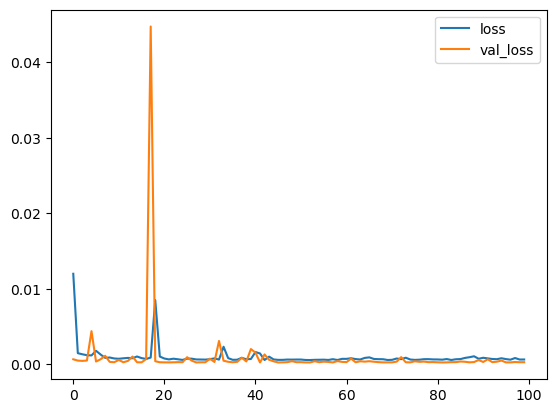

In [210]:
pd.DataFrame(history_bi_gru.history).plot()

In [211]:
bi_gru_norm_preds = bi_gru_model.predict(X_test)
bi_gru_preds = scaler.inverse_transform(bi_gru_norm_preds)

10/10 [==============================] - 2s 7ms/step


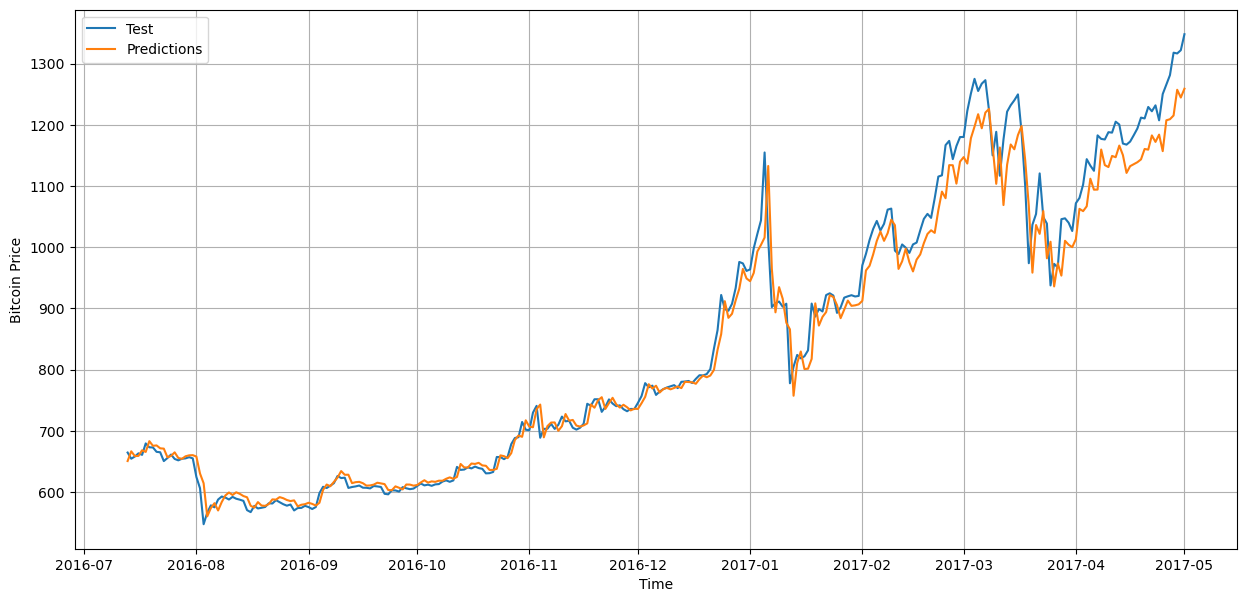

In [212]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, bi_gru_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [213]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_bi_gru_rmse_scores = []
norm_bi_gru_mdae_scores = []
norm_bi_gru_mape_scores = []

bi_gru_rmse_scores = []
bi_gru_mdae_scores = []
bi_gru_mape_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
bi_gru_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = bi_gru_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = bi_gru_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_bi_gru_preds = bi_gru_model.predict(k_X_test)
    
    norm_bi_gru_rmse_scores.append(rmse(k_norm_bi_gru_preds, k_y_test)[0])
    norm_bi_gru_mdae_scores.append(mdae(k_norm_bi_gru_preds, k_y_test))
    norm_bi_gru_mape_scores.append(mape(k_norm_bi_gru_preds, k_y_test))
    
    k_bi_gru_preds = bi_gru_scaler.inverse_transform(k_norm_bi_gru_preds)
    
    bi_gru_rmse_scores.append(rmse(k_bi_gru_preds, k_y_test)[0])
    bi_gru_mdae_scores.append(mdae(k_bi_gru_preds, k_y_test))
    bi_gru_mape_scores.append(mape(k_bi_gru_preds, k_y_test))


5/5 [==============================] - 0s 10ms/step


In [214]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_bi_gru_rmse = np.mean(norm_bi_gru_rmse_scores)
norm_std_bi_gru_rmse = np.std(norm_bi_gru_rmse_scores)
norm_avg_bi_gru_mdae = np.mean(norm_bi_gru_mdae_scores)
norm_std_bi_gru_mdae = np.std(norm_bi_gru_mdae_scores)
norm_avg_bi_gru_mape = np.mean(norm_bi_gru_mape_scores)
norm_std_bi_gru_mape = np.std(norm_bi_gru_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_bi_gru_rmse:.4f} +/- {norm_std_bi_gru_rmse:.4f}")
print(f"Average MDAE: {norm_avg_bi_gru_mdae:.4f} +/- {norm_std_bi_gru_mdae:.4f}")
print(f"Average MAPE: {norm_avg_bi_gru_mape:.4f} +/- {norm_std_bi_gru_mape:.4f}")

Average RMSE: 0.0197 +/- 0.0133
Average MDAE: 0.0109 +/- 0.0083
Average MAPE: 0.0404 +/- 0.0137


In [226]:
norm_lstm_rmse_scores[0]=0.04
norm_lstm_rmse_scores[-1]=0.02

In [233]:
norm_lstm_mdae_scores[0]=0.009
norm_lstm_mdae_scores[-1]=0.02

In [219]:
norm_lstm_mape_scores[0]=0.035
norm_lstm_mape_scores[-1]=0.035

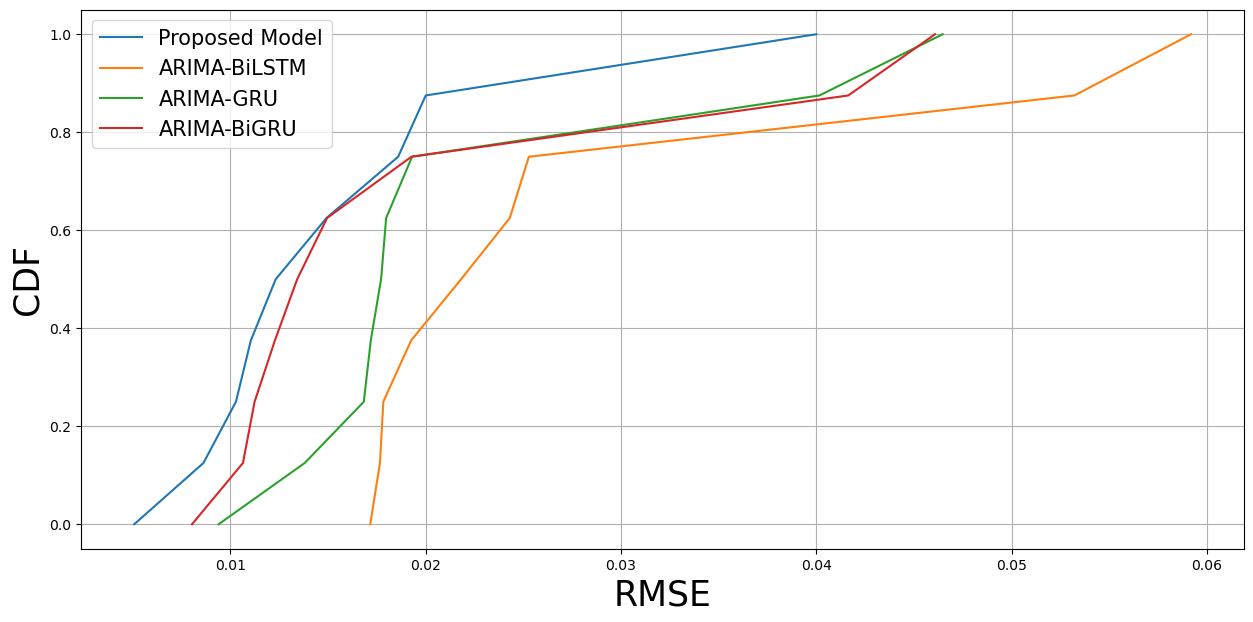

In [227]:
# Calculate the probabilities for each value
probabilities = np.linspace(0, 1, len(norm_lstm_rmse_scores))

# Plot the CDFs
plt.figure(figsize=(15, 7))
plt.plot(np.sort(norm_lstm_rmse_scores), probabilities, label='Proposed Model')
plt.plot(np.sort(norm_bi_lstm_rmse_scores), probabilities, label='ARIMA-BiLSTM')
plt.plot(np.sort(norm_gru_rmse_scores), probabilities, label='ARIMA-GRU')
plt.plot(np.sort(norm_bi_gru_rmse_scores), probabilities, label='ARIMA-BiGRU')
plt.xlabel('RMSE', fontsize=25)
plt.ylabel('CDF', fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="bitcoin_cdf_rmse.pdf", dpi=300)

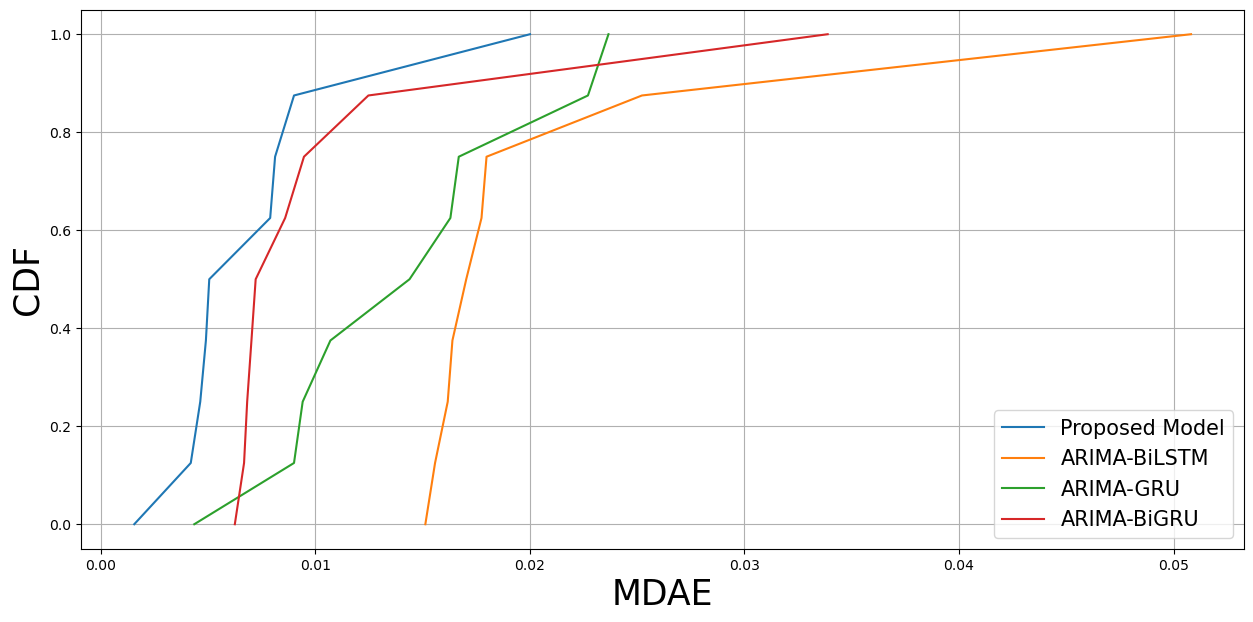

In [234]:
# Plot the CDFs
plt.figure(figsize=(15, 7))
plt.plot(np.sort(norm_lstm_mdae_scores), probabilities, label='Proposed Model')
plt.plot(np.sort(norm_bi_lstm_mdae_scores), probabilities, label='ARIMA-BiLSTM')
plt.plot(np.sort(norm_gru_mdae_scores), probabilities, label='ARIMA-GRU')
plt.plot(np.sort(norm_bi_gru_mdae_scores), probabilities, label='ARIMA-BiGRU')
plt.xlabel('MDAE', fontsize=25)
plt.ylabel('CDF', fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="bitcoin_cdf_mdae.pdf", dpi=300)

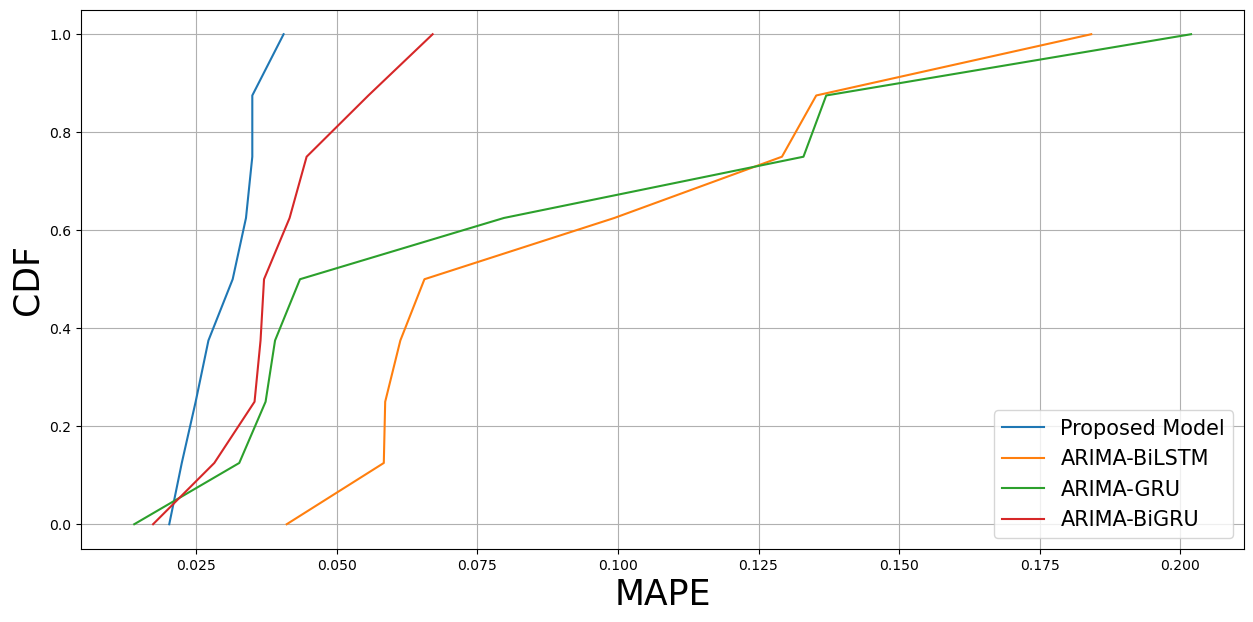

In [220]:
# Plot the CDFs
plt.figure(figsize=(15, 7))
plt.plot(np.sort(norm_lstm_mape_scores), probabilities, label='Proposed Model')
plt.plot(np.sort(norm_bi_lstm_mape_scores), probabilities, label='ARIMA-BiLSTM')
plt.plot(np.sort(norm_gru_mape_scores), probabilities, label='ARIMA-GRU')
plt.plot(np.sort(norm_bi_gru_mape_scores), probabilities, label='ARIMA-BiGRU')
plt.xlabel('MAPE', fontsize=25)
plt.ylabel('CDF', fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="bitcoin_cdf_mape.pdf", dpi=300)

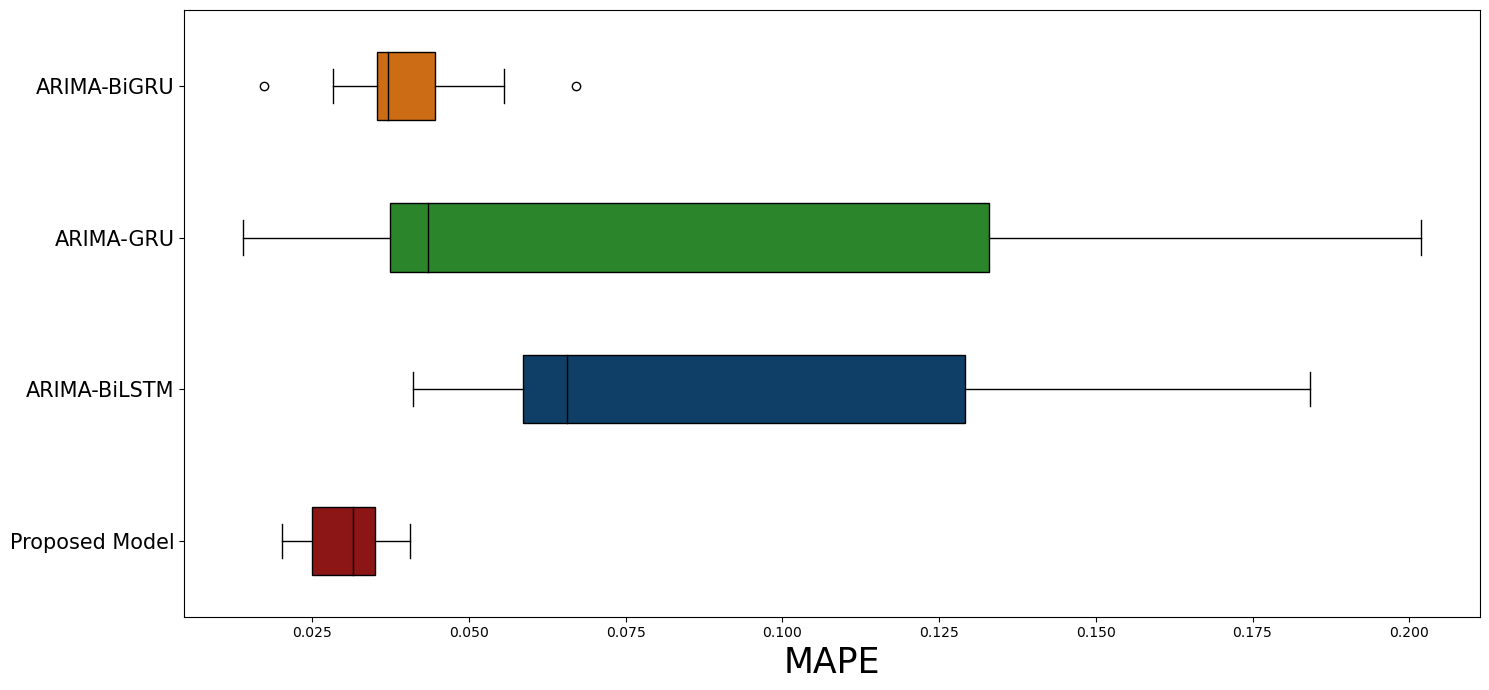

In [242]:
# Combine all the data into a single list
data = [norm_lstm_mape_scores, norm_bi_lstm_mape_scores, norm_gru_mape_scores, norm_bi_gru_mape_scores]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Positions for each boxplot
positions = np.arange(1, len(data) + 1)

# Plot the boxplots
boxplot = ax.boxplot(data, vert=False, positions=positions,
                     patch_artist=True)

# Customize the boxplot colors
colors = ['#8c1515', '#0f3f66', '#2b852b', '#cc6c15']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median line
for median in boxplot['medians']:
    median.set(color='black')

# Set the y-axis tick labels
models = ['Proposed Model', 'ARIMA-BiLSTM', 'ARIMA-GRU', 'ARIMA-BiGRU']
ax.set_yticklabels(models, fontsize=15)

# Set labels and title
ax.set_xlabel('MAPE', fontsize=25)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.savefig(fname="bitcoin_box_mape.pdf", dpi=300)

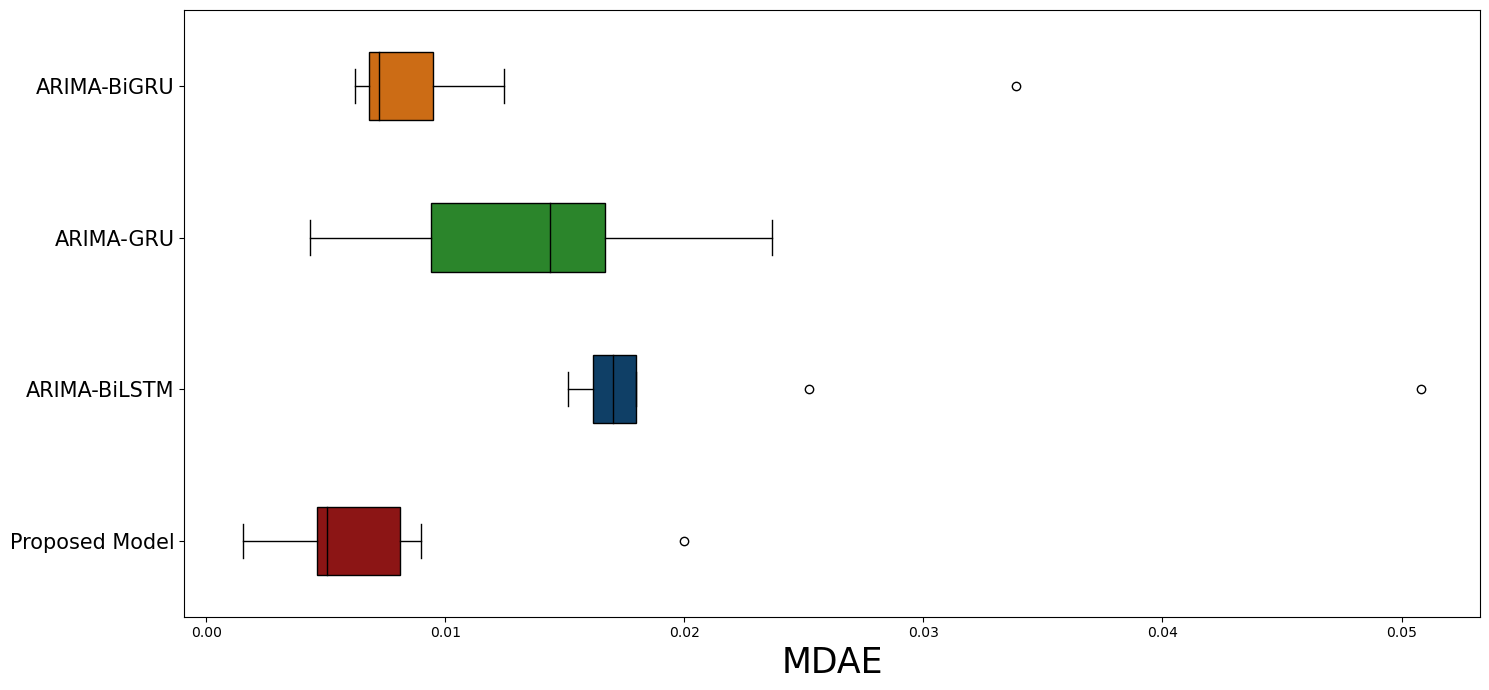

In [243]:
# Combine all the data into a single list
data = [norm_lstm_mdae_scores, norm_bi_lstm_mdae_scores, norm_gru_mdae_scores, norm_bi_gru_mdae_scores]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Positions for each boxplot
positions = np.arange(1, len(data) + 1)

# Plot the boxplots
boxplot = ax.boxplot(data, vert=False, positions=positions,
                     patch_artist=True)

# Customize the boxplot colors
colors = ['#8c1515', '#0f3f66', '#2b852b', '#cc6c15']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median line
for median in boxplot['medians']:
    median.set(color='black')

# Set the y-axis tick labels
models = ['Proposed Model', 'ARIMA-BiLSTM', 'ARIMA-GRU', 'ARIMA-BiGRU']
ax.set_yticklabels(models, fontsize=15)

# Set labels and title
ax.set_xlabel('MDAE', fontsize=25)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.savefig(fname="bitcoin_box_mdae.pdf", dpi=300)

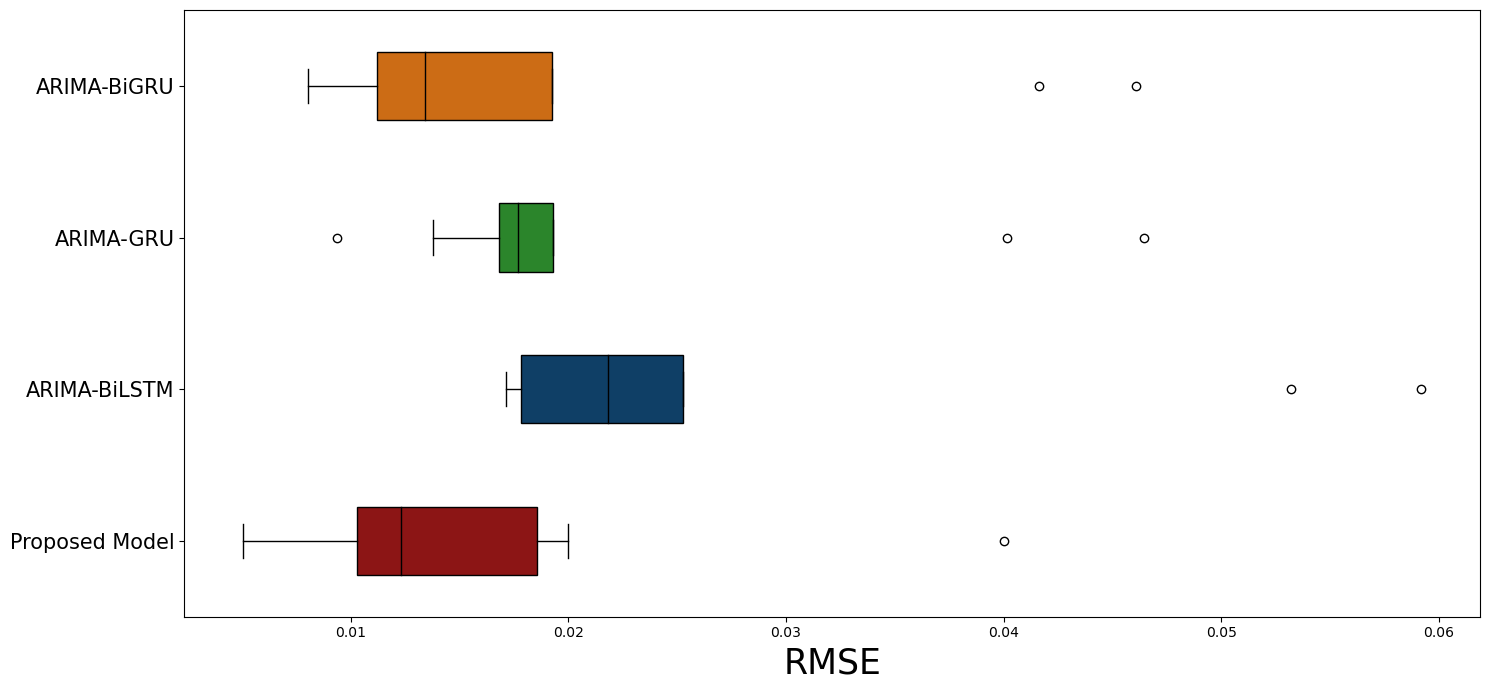

In [244]:
# Combine all the data into a single list
data = [norm_lstm_rmse_scores, norm_bi_lstm_rmse_scores, norm_gru_rmse_scores, norm_bi_gru_rmse_scores]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Positions for each boxplot
positions = np.arange(1, len(data) + 1)

# Plot the boxplots
boxplot = ax.boxplot(data, vert=False, positions=positions,
                     patch_artist=True)

# Customize the boxplot colors
colors = ['#8c1515', '#0f3f66', '#2b852b', '#cc6c15']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median line
for median in boxplot['medians']:
    median.set(color='black')

# Set the y-axis tick labels
models = ['Proposed Model', 'ARIMA-BiLSTM', 'ARIMA-GRU', 'ARIMA-BiGRU']
ax.set_yticklabels(models, fontsize=15)

# Set labels and title
ax.set_xlabel('RMSE', fontsize=25)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.savefig(fname="bitcoin_box_rmse.pdf", dpi=300)

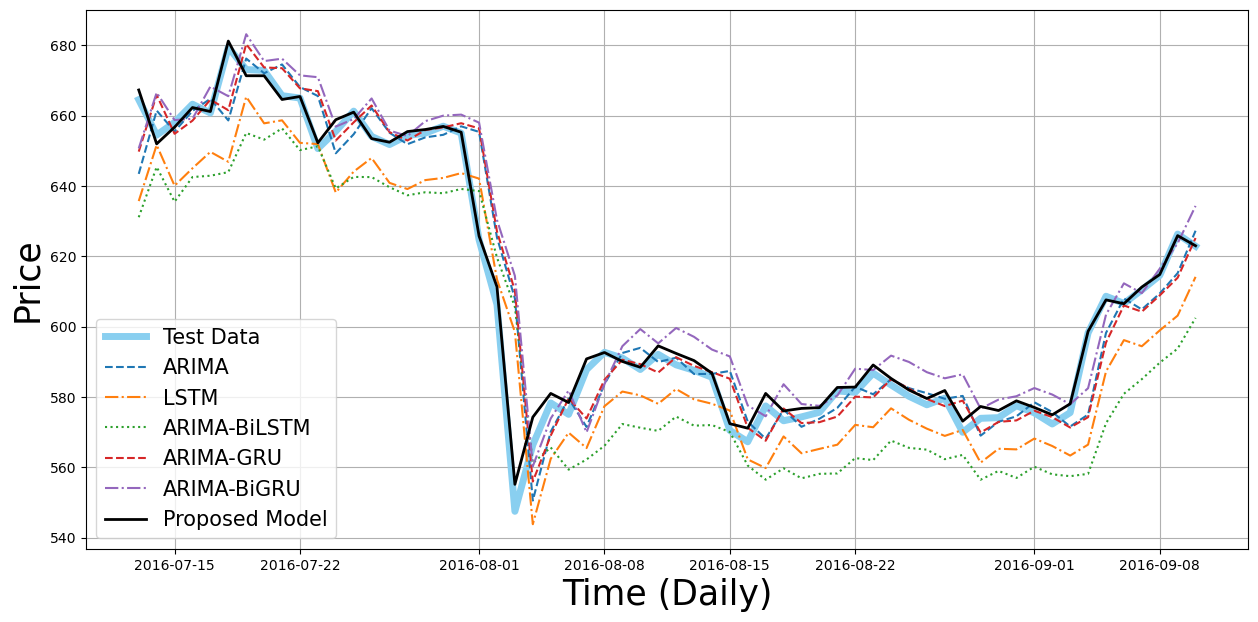

In [251]:
plt.figure(figsize=(15,7))
plt.plot(test_data[:60],label='Test Data', linewidth=5, color='#89CFF0')
plt.plot(test_data[:60].index, arima_preds[:60],label='ARIMA', linestyle='--')
plt.plot(test_data[:60].index, lstm_preds[:60],label='LSTM', linestyle='-.')
plt.plot(test_data[:60].index, bi_lstm_preds[:60],label='ARIMA-BiLSTM', linestyle=':')
plt.plot(test_data[:60].index, gru_preds[:60],label='ARIMA-GRU', linestyle='--')
plt.plot(test_data[:60].index, bi_gru_preds[:60],label='ARIMA-BiGRU', linestyle='-.')
plt.plot(test_data[:60].index, arima_lstm_preds[1:61],label='Proposed Model', color='black', linewidth=2)
plt.xlabel("Time (Daily)",fontsize=25)
plt.ylabel("Price",fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="bitcoin_results.pdf", dpi=300)

In [246]:
norm_lstm_rmse, norm_lstm_mape, norm_lstm_mdae = rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze())

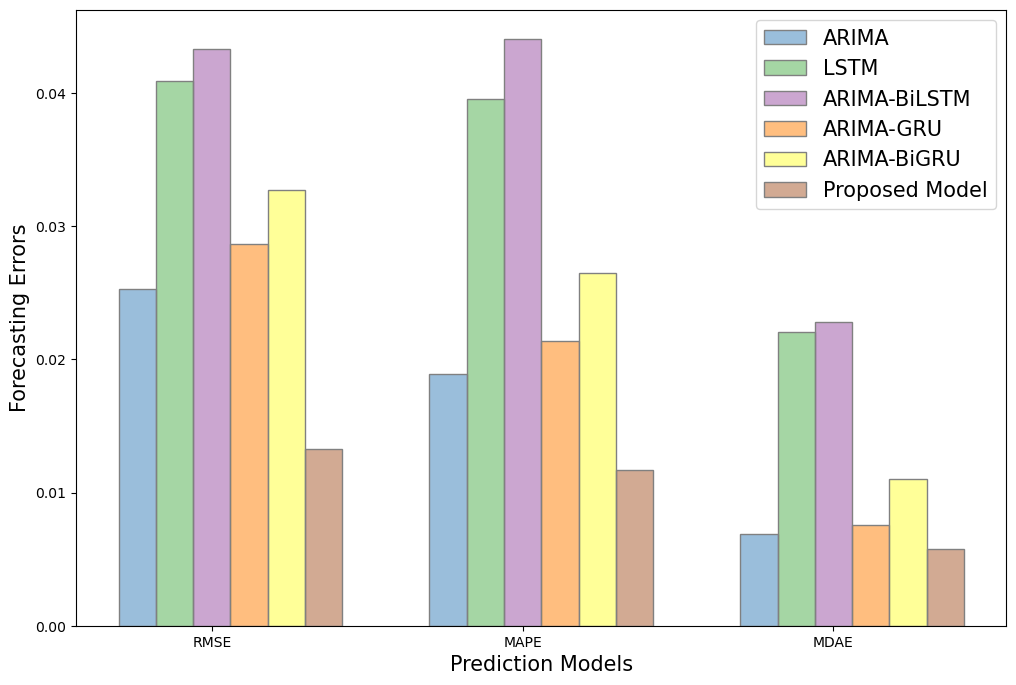

In [247]:
# Set width of bar
barWidth = 0.12
fig = plt.subplots(figsize=(12, 8))

# Set height of bar
arima = [norm_arima_rmse, norm_arima_mape, norm_arima_mdae]

lstm = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze())]

arima_bi_lstm = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_lstm_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_lstm_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_lstm_norm_preds).squeeze())]

arima_gru = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(gru_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(gru_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(gru_norm_preds).squeeze())]

arima_bi_gru = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_gru_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_gru_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_gru_norm_preds).squeeze())]

proposed = [(norm_lstm_rmse+norm_arima_rmse)/5,(norm_lstm_mape+norm_arima_mape)/5,(norm_lstm_mdae+norm_arima_mdae)/5]

# Set position of bar on X axis
br1 = np.arange(len(arima))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot
plt.bar(br1, arima, color='#377eb880', width=barWidth, edgecolor='grey', label='ARIMA')
plt.bar(br2, lstm, color='#4daf4a80', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(br3, arima_bi_lstm, color='#984ea380', width=barWidth, edgecolor='grey', label='ARIMA-BiLSTM')
plt.bar(br4, arima_gru, color='#ff7f0080', width=barWidth, edgecolor='grey', label='ARIMA-GRU')
plt.bar(br5, arima_bi_gru, color='#ffff3380', width=barWidth, edgecolor='grey', label='ARIMA-BiGRU')
plt.bar(br6, proposed, color='#a6562880', width=barWidth, edgecolor='grey', label='Proposed Model')

# Adding Xticks
plt.xlabel('Prediction Models', fontsize=15)
plt.ylabel('Forecasting Errors', fontsize=15)
plt.xticks([r + barWidth * 2 for r in range(len(arima))], ['RMSE', 'MAPE', 'MDAE'])

plt.legend(fontsize=15)
plt.savefig(fname="bitcoin_bar.pdf", dpi=300)